# Introdução

Notebook com os gráficos utilizados na seção de fatos estilizados da dissertação.

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import pandas_datareader.data as web
from datetime import datetime as dt

from scipy.interpolate import make_interp_spline, BSpline #Smooth plot

sns.set(style="whitegrid")

# Saldo financeiro líquido

In [2]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'W995RC1Q027SBEA', # Domestic business
        'W996RC1Q027SBEA', # Households and institutions
        'AD01RC1Q027SBEA', # Government
        'NETFI', # Balance on Current Account, NIPA's
        'GDP', # Gross Domestic Product
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Firmas',
    'Famílias',
    'Governo',
    'Setor Externo',
    'PIB'
]
df.index.name = ''

df = df.dropna()
df['Setor Externo'] = -df['Setor Externo']
df['Soma'] = df.sum(axis='columns')
df = df.apply(lambda x: x/df['PIB'])

df['Setor Privado'] = df['Firmas'] + df['Famílias']
#df = -df

df.head()

,Firmas,Famílias,Governo,Setor Externo,PIB,Soma,Setor Privado
,,,,,,,
1960-01-01,-0.014306,0.031884,-0.014142,-0.003437,1.0,1.000000,0.017579
1960-04-01,-0.008300,0.032069,-0.020587,-0.003184,1.0,0.999998,0.023769
1960-07-01,-0.003598,0.037483,-0.026164,-0.007724,1.0,0.999998,0.033885
1960-10-01,0.006018,0.036583,-0.033560,-0.009041,1.0,1.000000,0.042601
1961-01-01,0.004259,0.043808,-0.038090,-0.009978,1.0,0.999998,0.048066


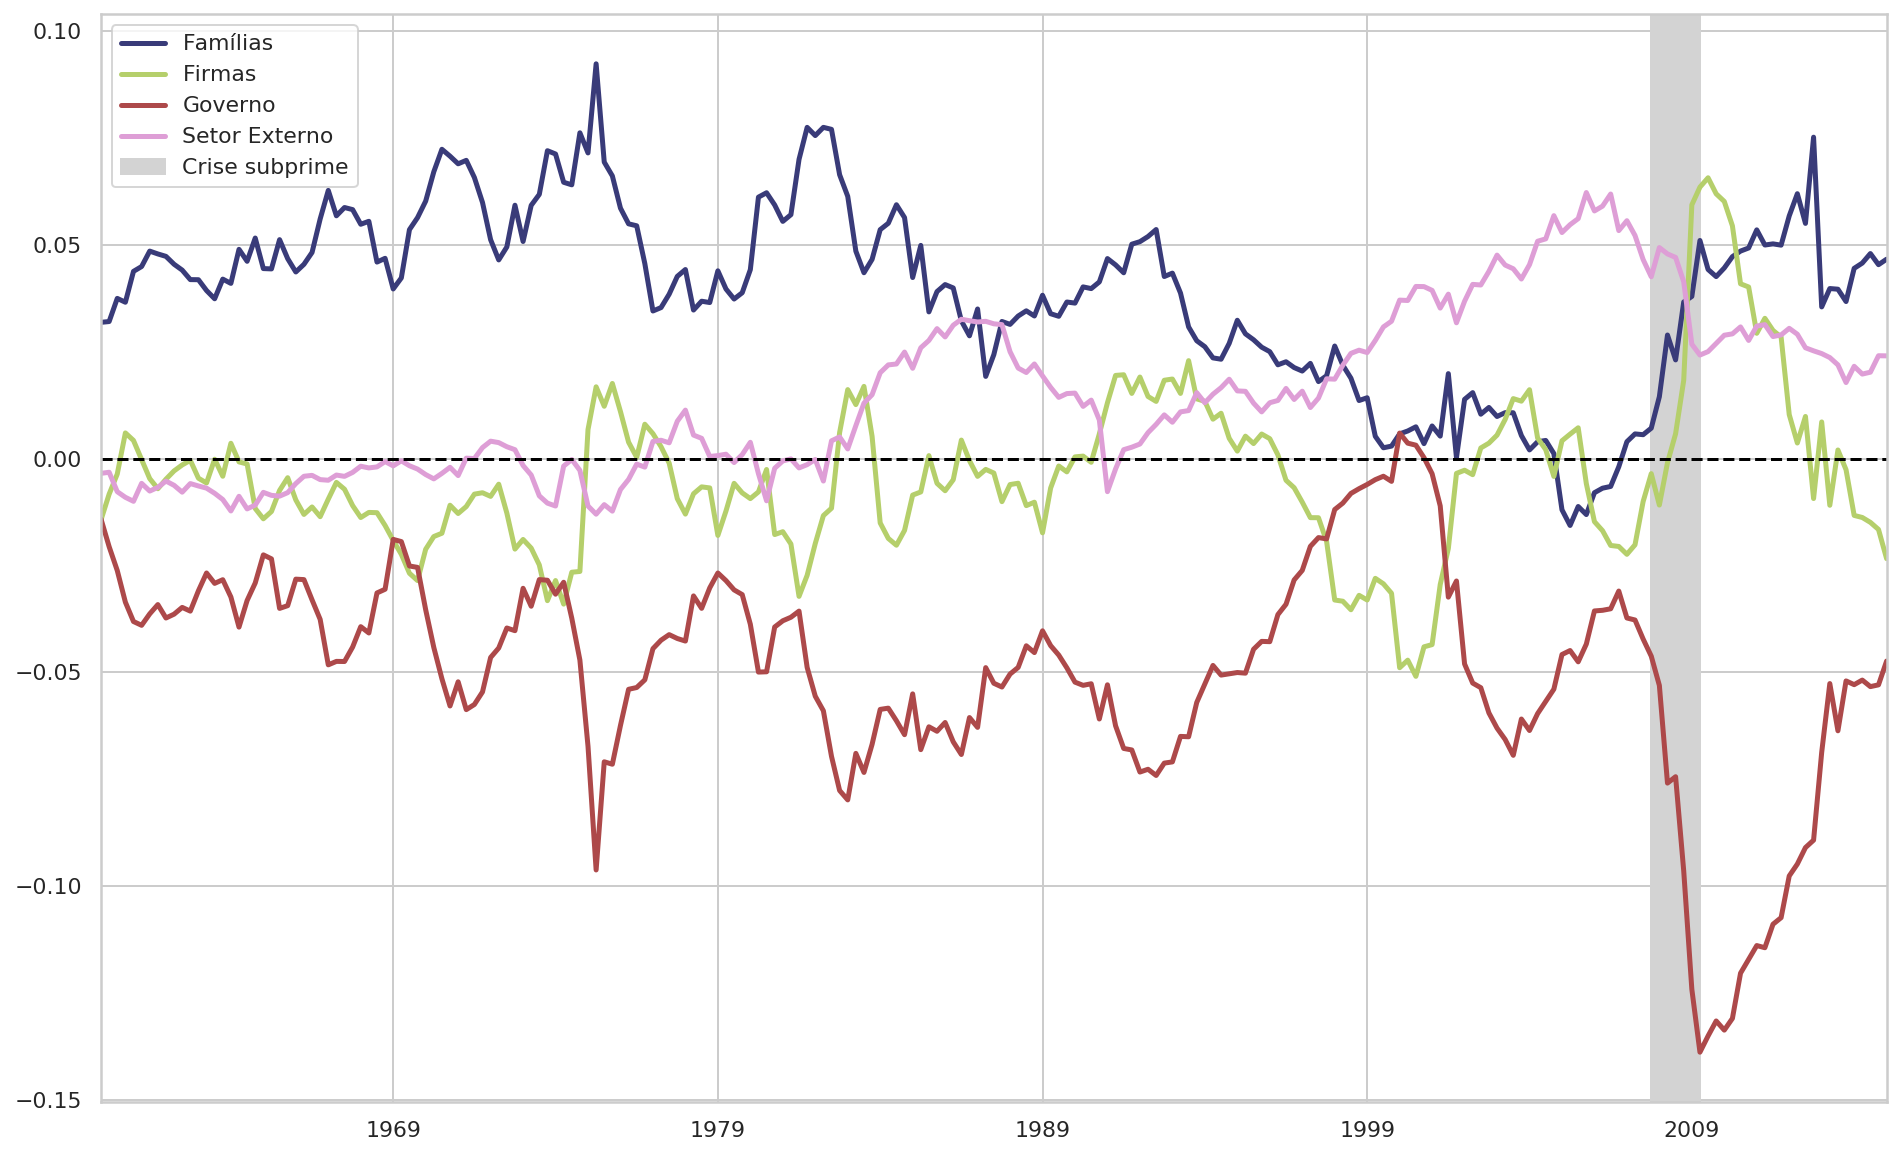

In [3]:
fig, ax = plt.subplots(figsize=(16, 10))

df[[
    'Famílias', 'Firmas',
    'Governo', 
    'Setor Externo'
]].plot(
    ax=ax,
    cmap="tab20b", 
    linewidth=2.5
)
ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime'
)

ax.legend()

ax.axhline(y=0, color='black', ls='--')

plt.show()

/home/gpetrini/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
No handles with labels found to put in legend.


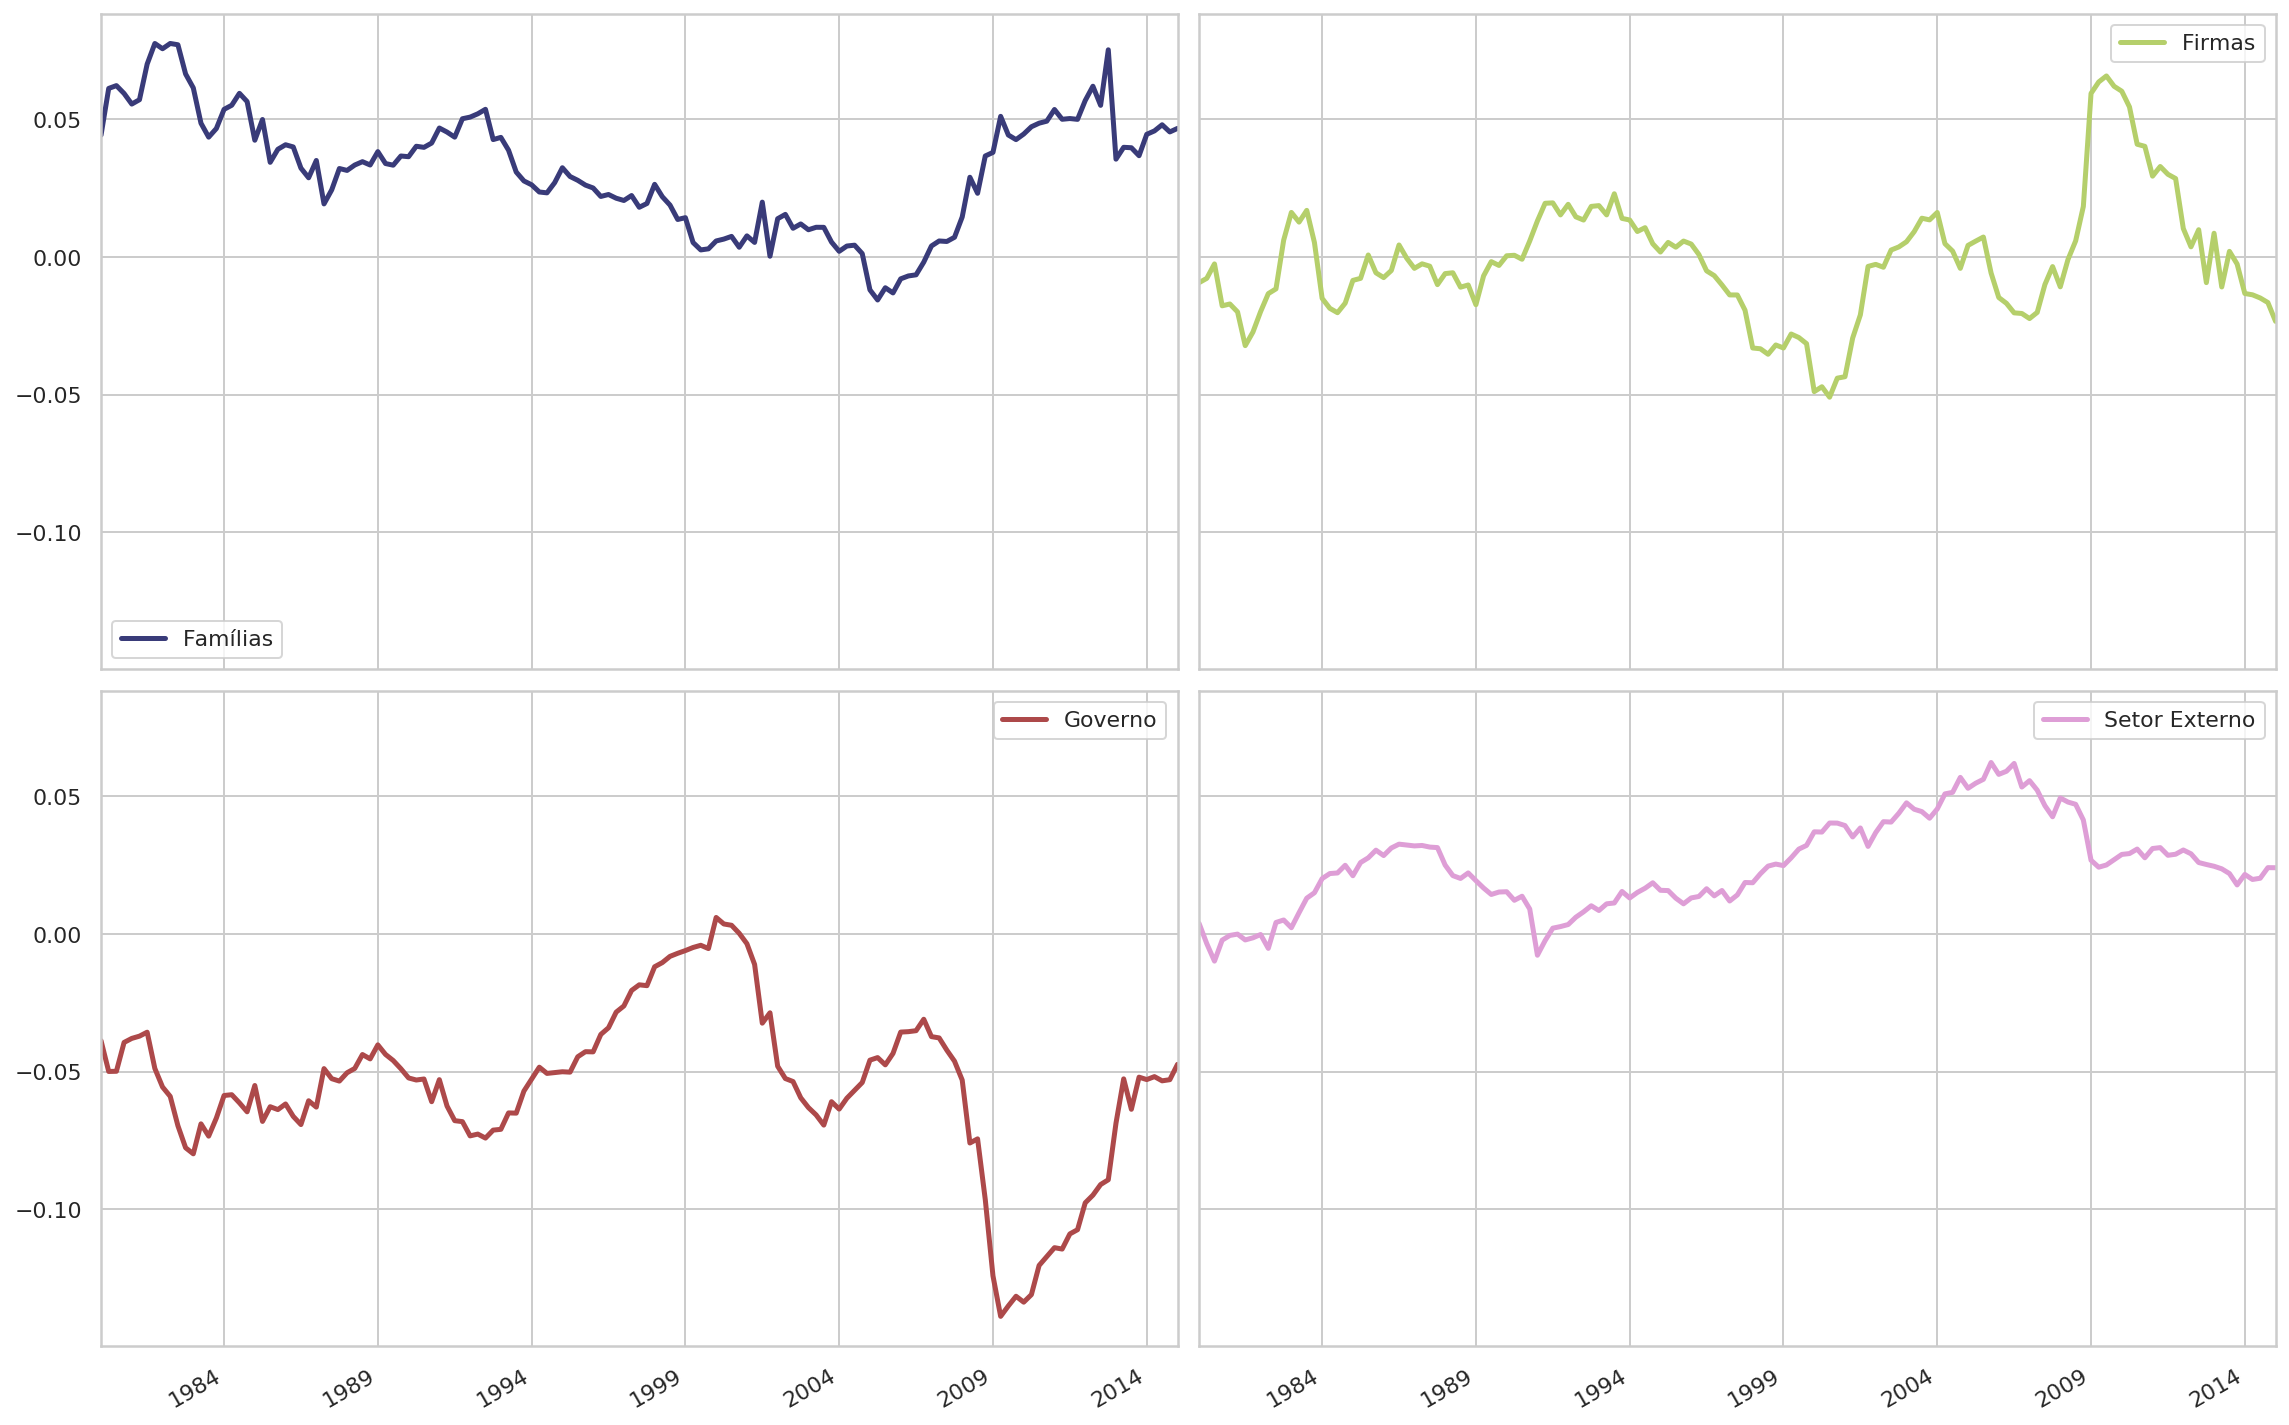

In [4]:
fig, ax = plt.subplots(figsize=(16, 10))

df.loc['1980':, [
    'Famílias', 'Firmas',
    'Governo', 
    'Setor Externo'
]].plot(
    ax=ax,
    cmap="tab20b", 
    linewidth=2.5,
    subplots=True,
    sharex=True, sharey=True,
    layout=(2,2)
)


ax.legend()

ax.axhline(y=0, color='black', ls='--')
plt.tight_layout()

plt.show()

In [5]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'TFAABSHNO', # total financial assets, Level
        'BOGZ1LM152010005Q', # nonfinancial assets, Market value levels
        'TLBSHNO', # total liabilities, Level
        'TNWBSHNO', # net worth, Level
        'TABSHNO', # Households and nonprofit organizations; total assets, Level
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Ativos Financeiros',
    'Ativos não financeiros',
    'Passivos',
    'Patrimônio Líquido',
    'Riqueza total'
]
df.index.name = ''
df['Ativos não financeiros'] = df['Ativos não financeiros']/1000

df = df.dropna()
df = df.apply(lambda x: x/df['Riqueza total'])*100

df.head()

,Ativos Financeiros,Ativos não financeiros,Passivos,Patrimônio Líquido,Riqueza total
,,,,,
1947-10-01,72.755215,27.244785,4.508440,95.491560,100.0
1948-10-01,71.278984,28.721016,5.045928,94.954072,100.0
1949-10-01,70.236043,29.763957,5.519533,94.480467,100.0
1950-10-01,68.971417,31.028583,6.152366,93.847634,100.0
1951-10-01,68.454218,31.545782,6.263102,93.736898,100.0


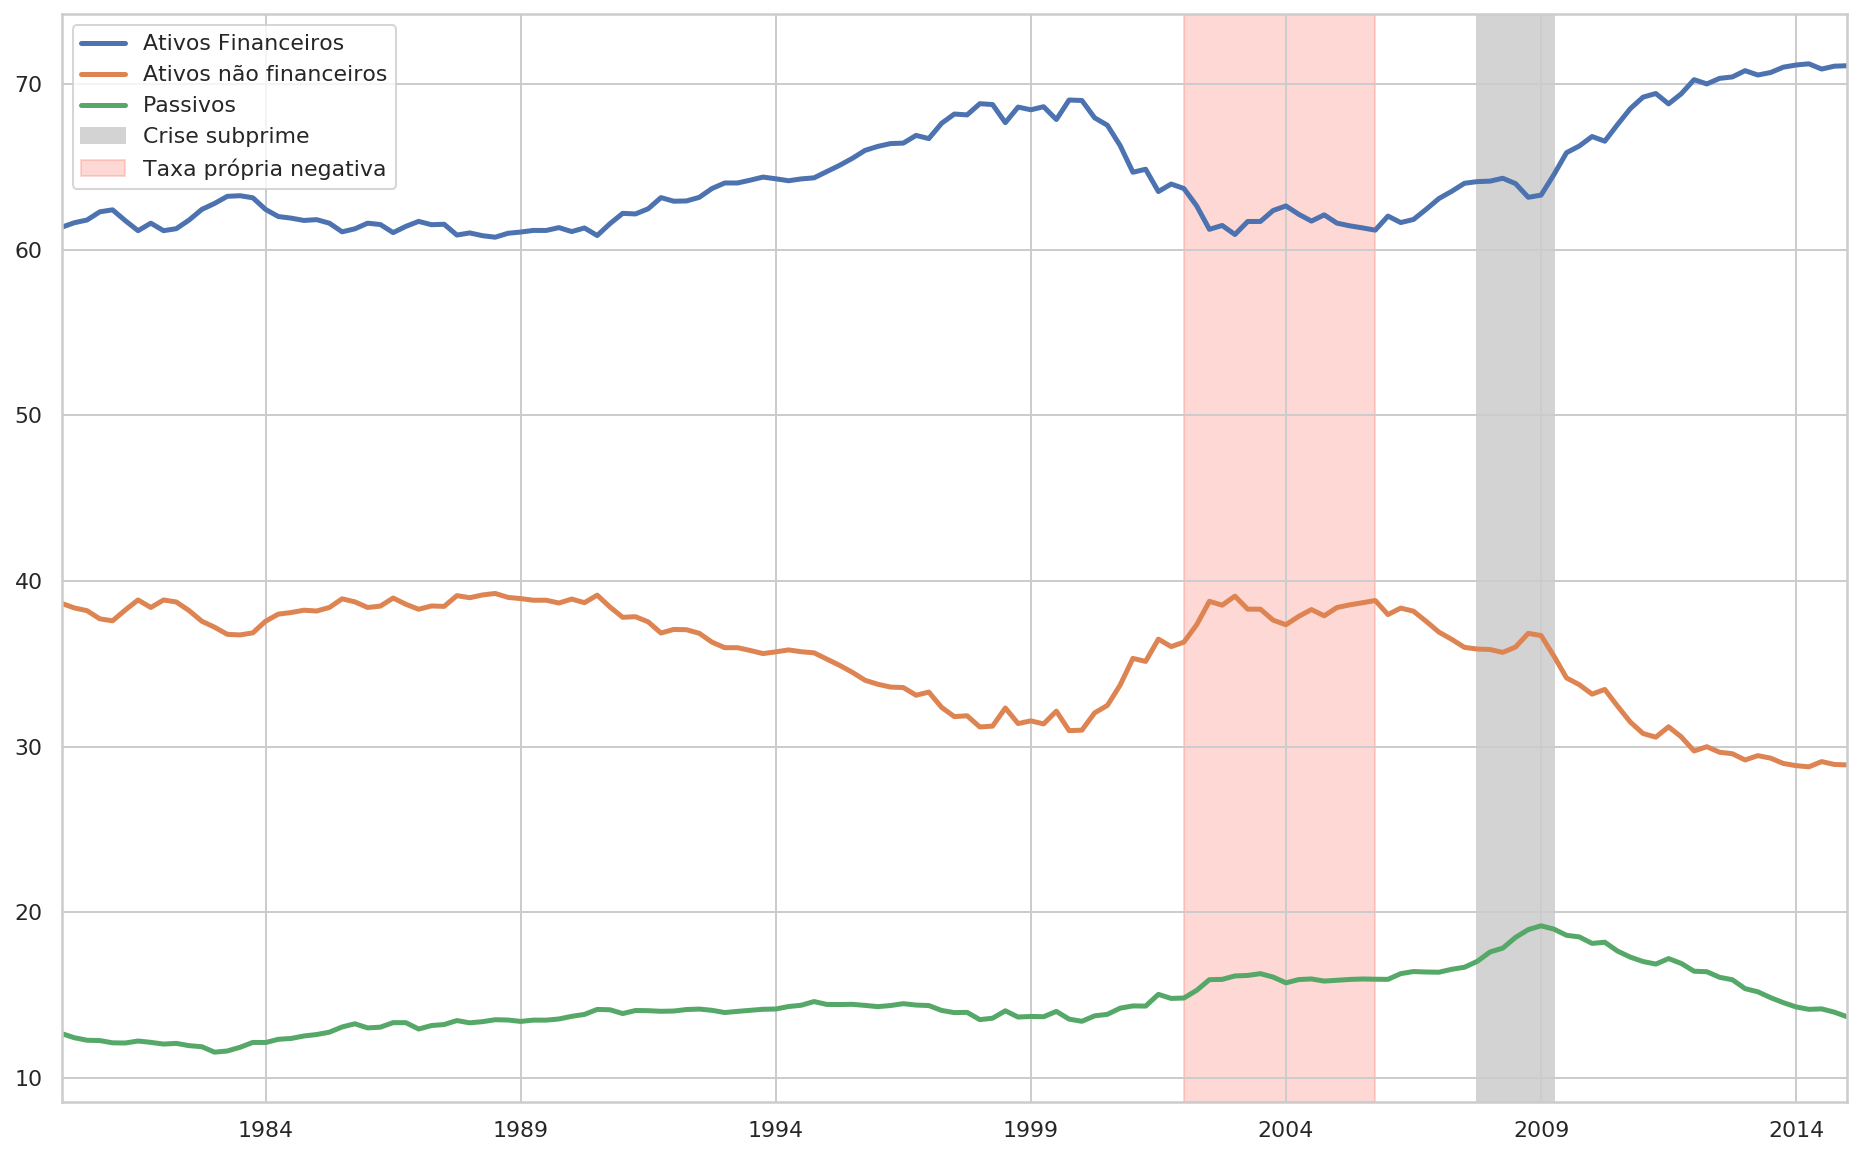

In [6]:
fig, ax = plt.subplots(figsize=(16, 10))

df.drop(['Riqueza total', 'Patrimônio Líquido'],'columns')[df.index>='1980-01-01'].plot(
    ax=ax,
    linewidth=2.5,
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    zorder=0
)

ax.axvspan(
    xmin='2002-01-01', 
    xmax='2005-12-01',
    color='salmon', 
    label='Taxa própria negativa',
    zorder=-1,
    alpha=.3
)

ax.legend()

plt.show()

# Endividamento das famílias

In [7]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'HHMSDODNS', # home mortgages; liability, Level
        'HCCSDODNS', # consumer credit; liability, Level
        'TNWBSHNO', # net worth, Level
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Hipotecas',
    'Crédito',
    'Patrimônio líquido',
]

df.index.name = ''

df = df.dropna()
df = df.apply(lambda x: x/df['Patrimônio líquido']).drop(['Patrimônio líquido'], 'columns')

df.head()

,Hipotecas,Crédito
,,
1947-10-01,0.028720,0.013511
1948-10-01,0.032228,0.015749
1949-10-01,0.034653,0.017948
1950-10-01,0.038624,0.020441
1951-10-01,0.040442,0.019795


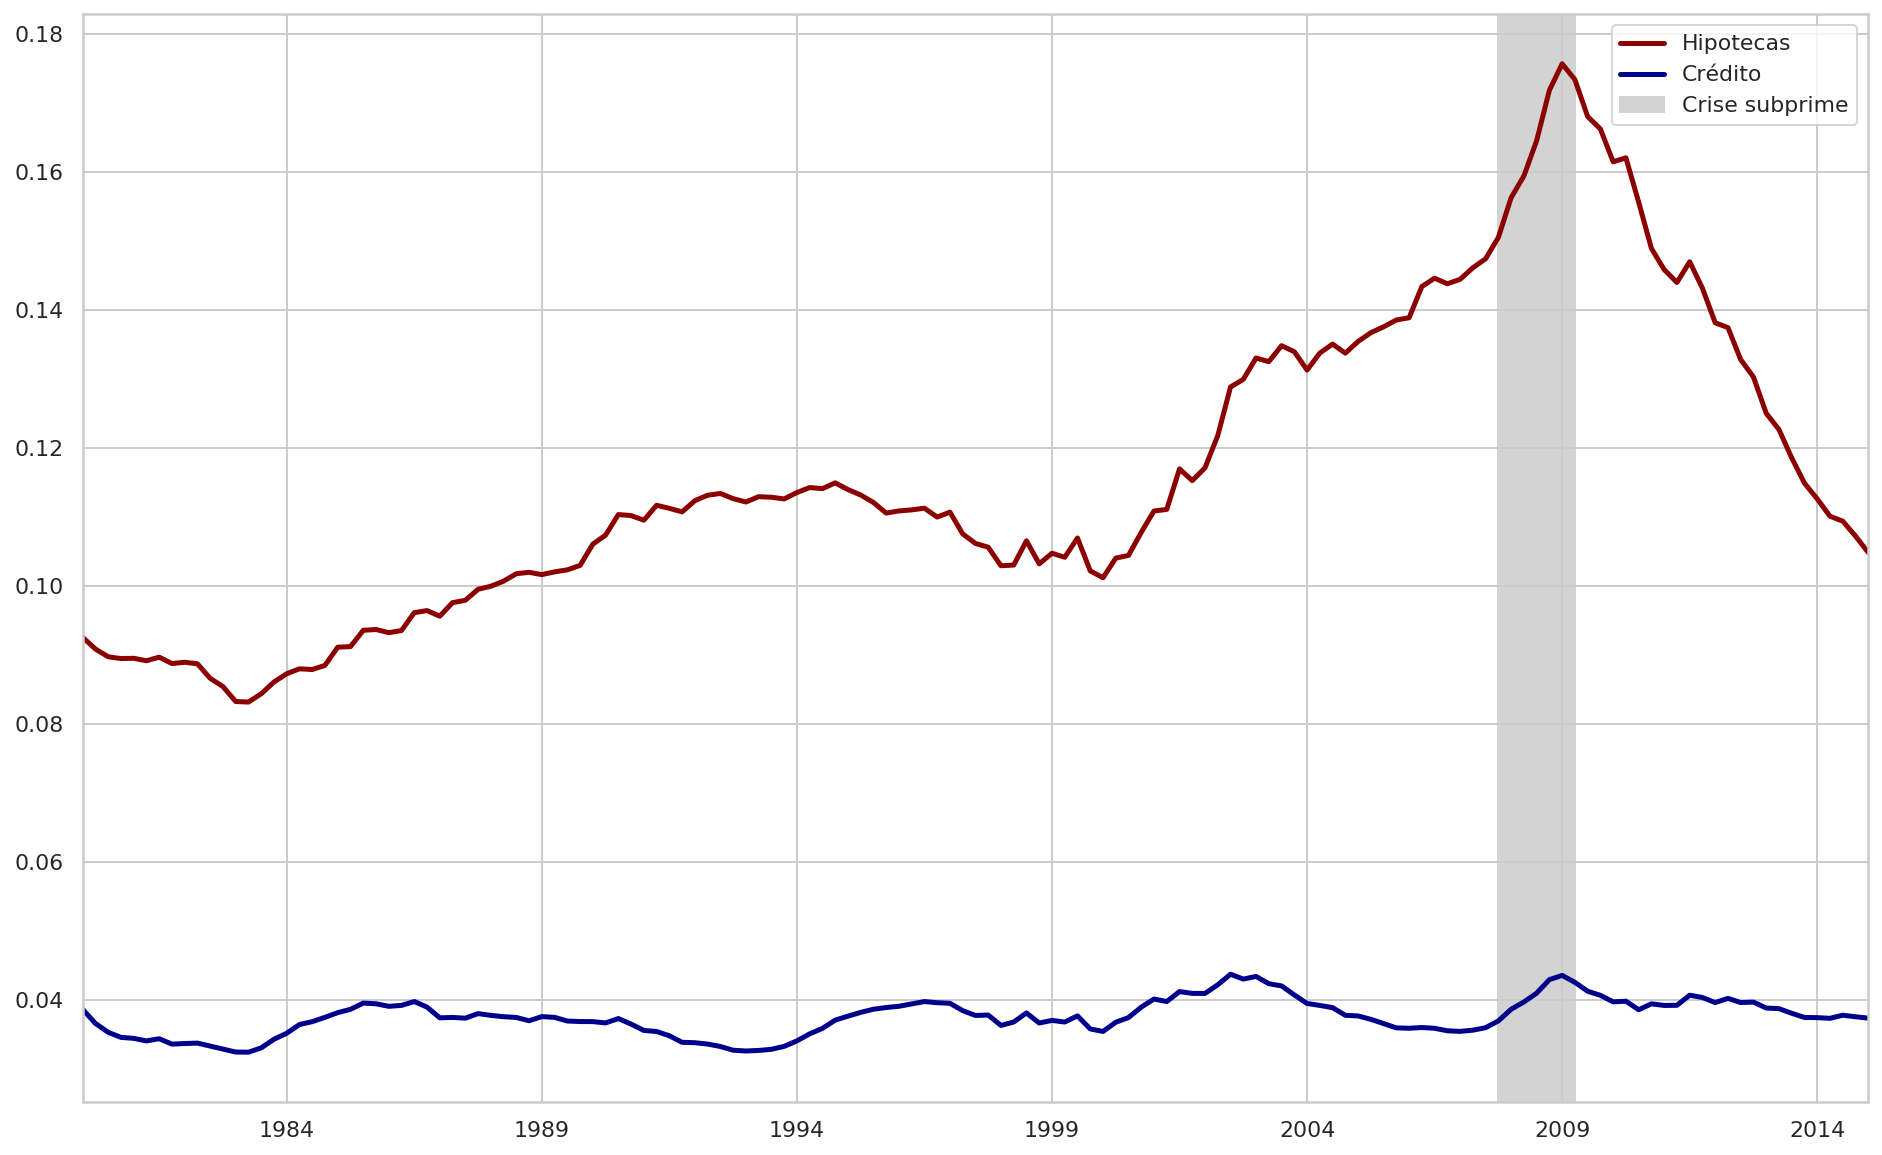

In [8]:
fig, ax = plt.subplots(figsize=(16, 10))

df.iloc[df.index>='1980-01',:].plot(
    ax=ax,
    color=('darkred', 'darkblue'),
    linewidth=2.5,
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    zorder=0
)
ax.legend()

plt.show()

In [9]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'CMDEBT', # debt securities and loans; liability, Level 
        #'PCEC', # Personal Consumption Expenditures # CHECAR
        'DPHCRC1A027NBEA', # Personal consumption expenditures: Household consumption expenditures
        'TNWBSHNO', # net worth, Level
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Dívida',
    'Consumo',
    'Patrimônio líquido',
]

df.index.name = ''

df = df.dropna()
df = df.apply(lambda x: x/df['Patrimônio líquido']).drop(['Patrimônio líquido'], 'columns')

df.head()

,Dívida,Consumo
,,
1952-01-01,0.065996,0.166667
1953-01-01,0.073995,0.170393
1954-01-01,0.078066,0.167800
1955-01-01,0.083528,0.169336
1956-01-01,0.088648,0.162726


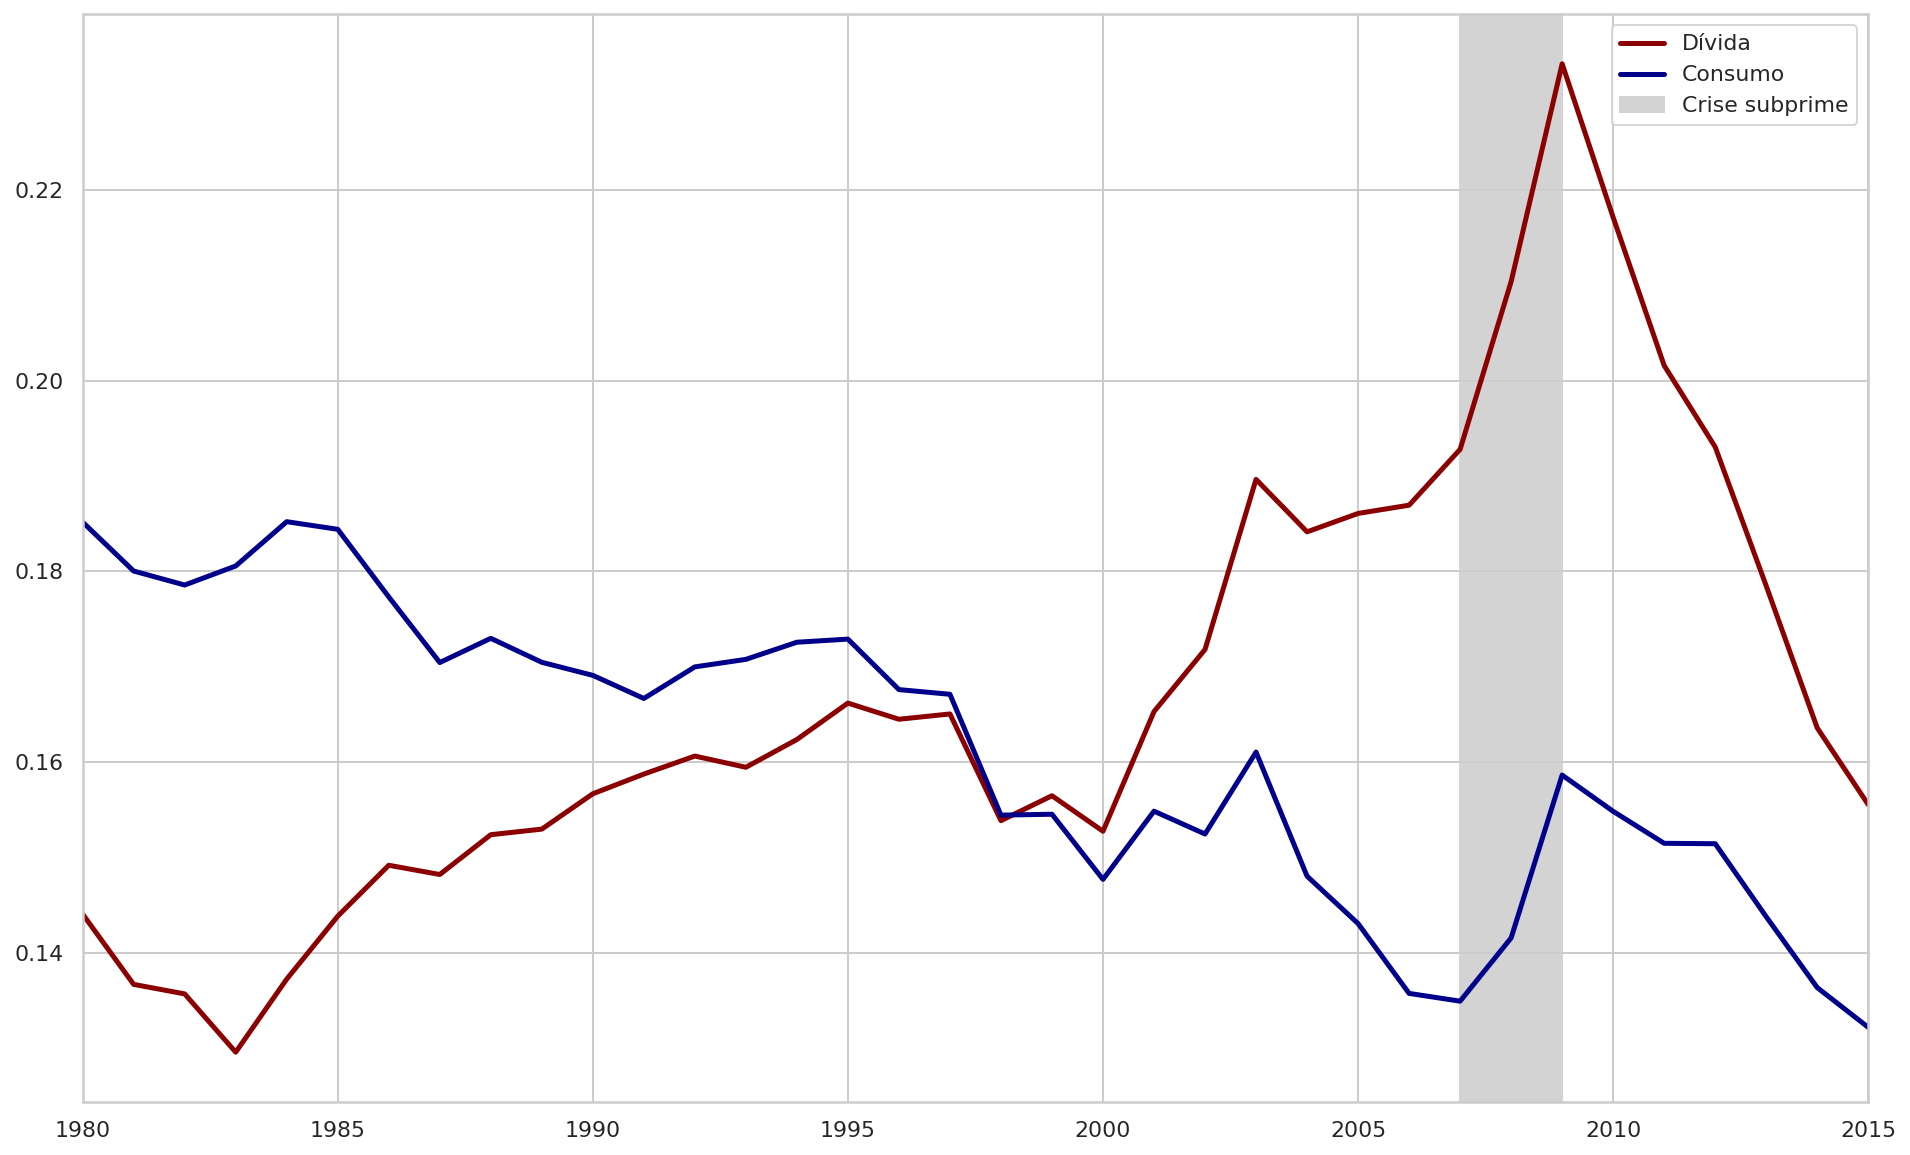

In [10]:
fig, ax = plt.subplots(figsize=(16, 10))

df.iloc[df.index>='1980-01',:].plot(
    ax=ax,
    color=('darkred', 'darkblue'),
    linewidth=2.5,
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    zorder=0
)
ax.legend()

plt.show()

In [11]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'CMDEBT', # debt securities and loans; liability, Level 
        'CSUSHPINSA', # S&P/Case-Shiller U.S. National Home Price Index
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Dívida das famílias',
    'Preço dos imóveis',
]

for i in df.columns:
    df[i] = (df[i]/df[i]['2000-01-01'])*100

df.index.name = ''
df = df.resample("QS").mean().dropna()
df.head()

,Dívida das famílias,Preço dos imóveis
,,
1987-01-01,38.457941,64.133333
1987-04-01,39.632448,65.600667
1987-07-01,40.624038,67.240667
1987-10-01,41.026038,68.127333
1988-01-01,42.135434,68.955667


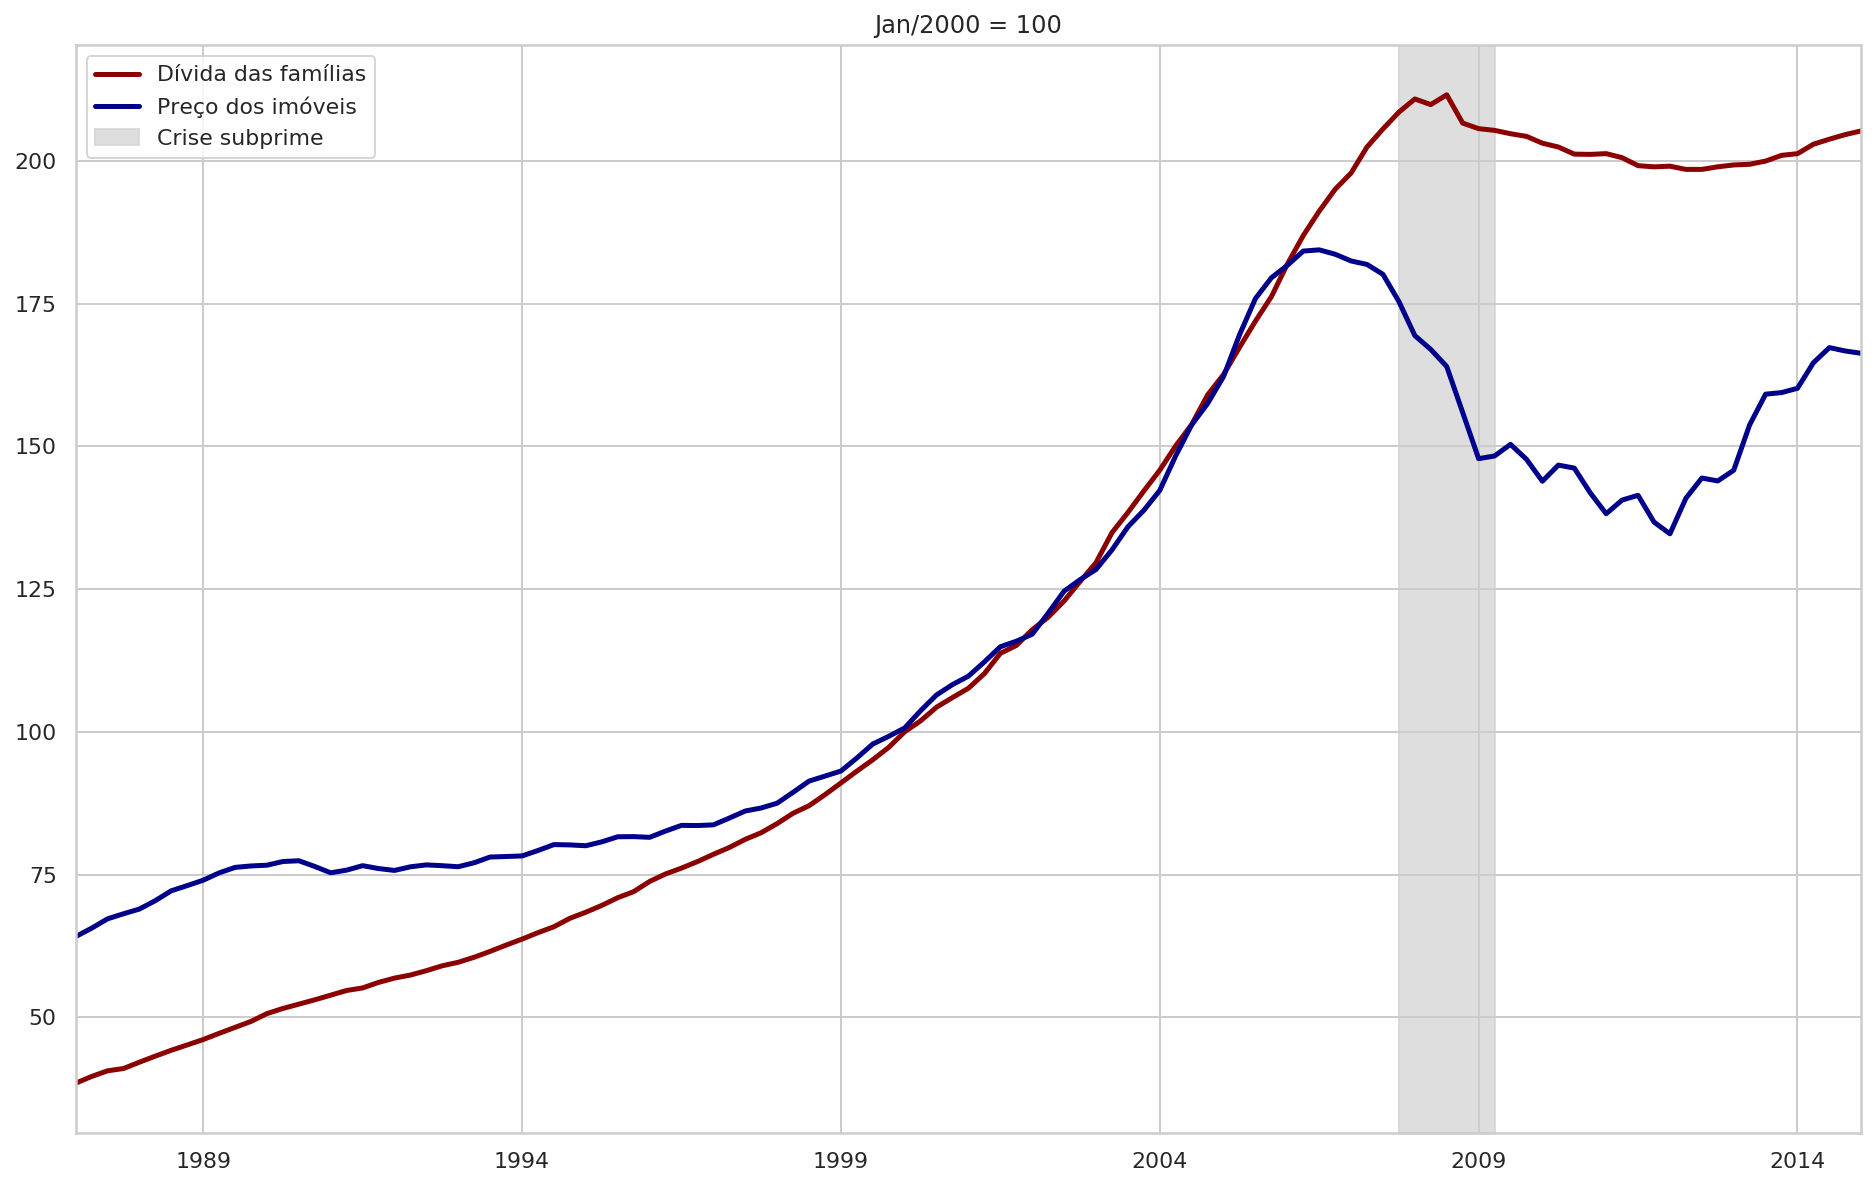

In [12]:
fig, ax = plt.subplots(figsize=(16, 10))

df.iloc[df.index>='1970-01',:].plot(
    ax=ax,
    color=('darkred', 'darkblue'),
    linewidth=2.5,
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    alpha=.75,
    zorder=0,
)
ax.legend()
ax.set_title('Jan/2000 = 100')

plt.show()

# Consumo das famílias

In [13]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'DPCERE1Q156NBEA', # Shares of gross domestic product: Personal consumption expenditures
        'LABSHPUSA156NRUG', # Share of Labour Compensation in GDP at Current National Prices for United States
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Consumo',
    'Salários',
]
df['Salários'] = df['Salários']*100

df.index.name = ''
df = df.resample("A").mean().dropna()
df.head()

,Consumo,Salários
,,
1950-12-31,64.10,62.836289
1951-12-31,60.10,63.373178
1952-12-31,59.70,64.485157
1953-12-31,59.80,64.449602
1954-12-31,61.35,63.705200


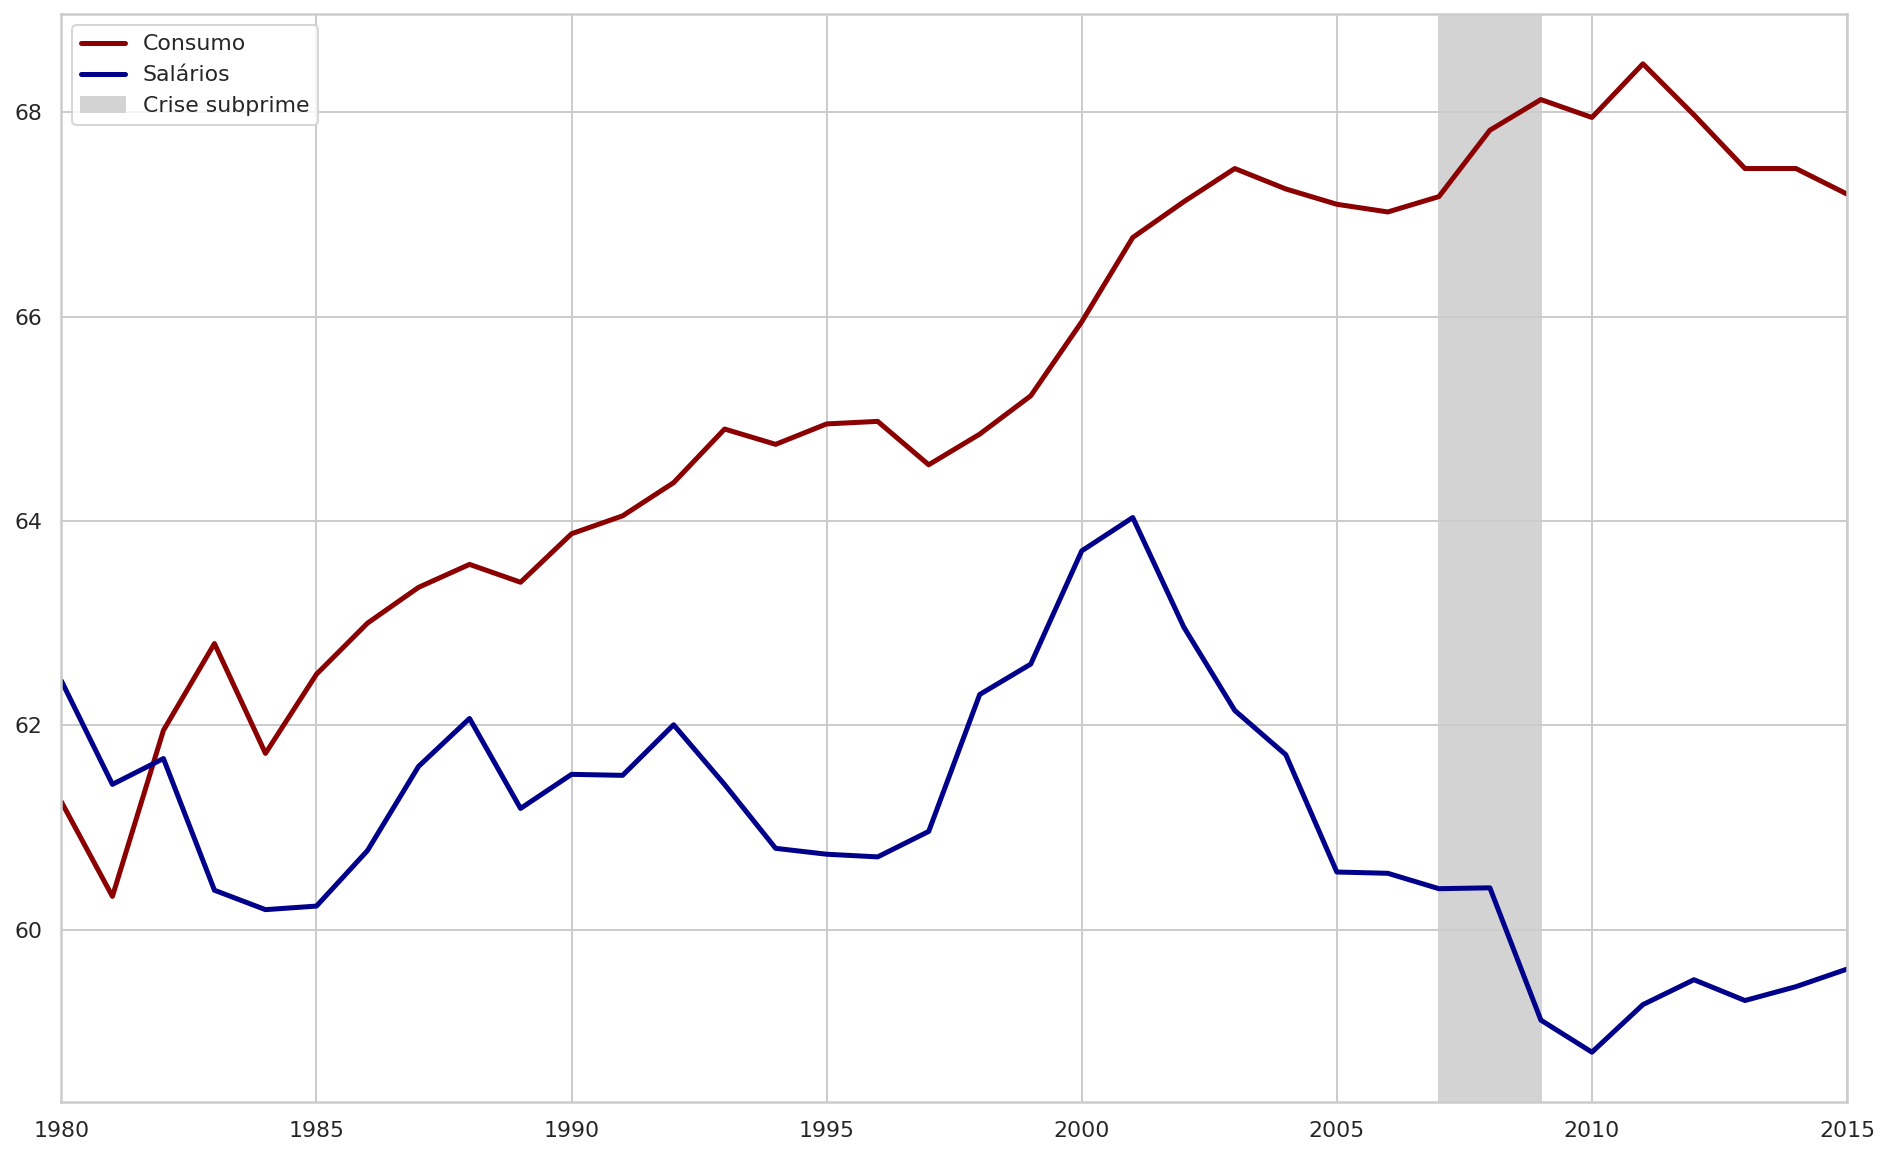

In [14]:
fig, ax = plt.subplots(figsize=(16, 10))

df.iloc[df.index>='1980-01',:].plot(
    ax=ax,
    color=('darkred', 'darkblue'),
    linewidth=2.5,
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    zorder=0
)
ax.legend()

plt.show()

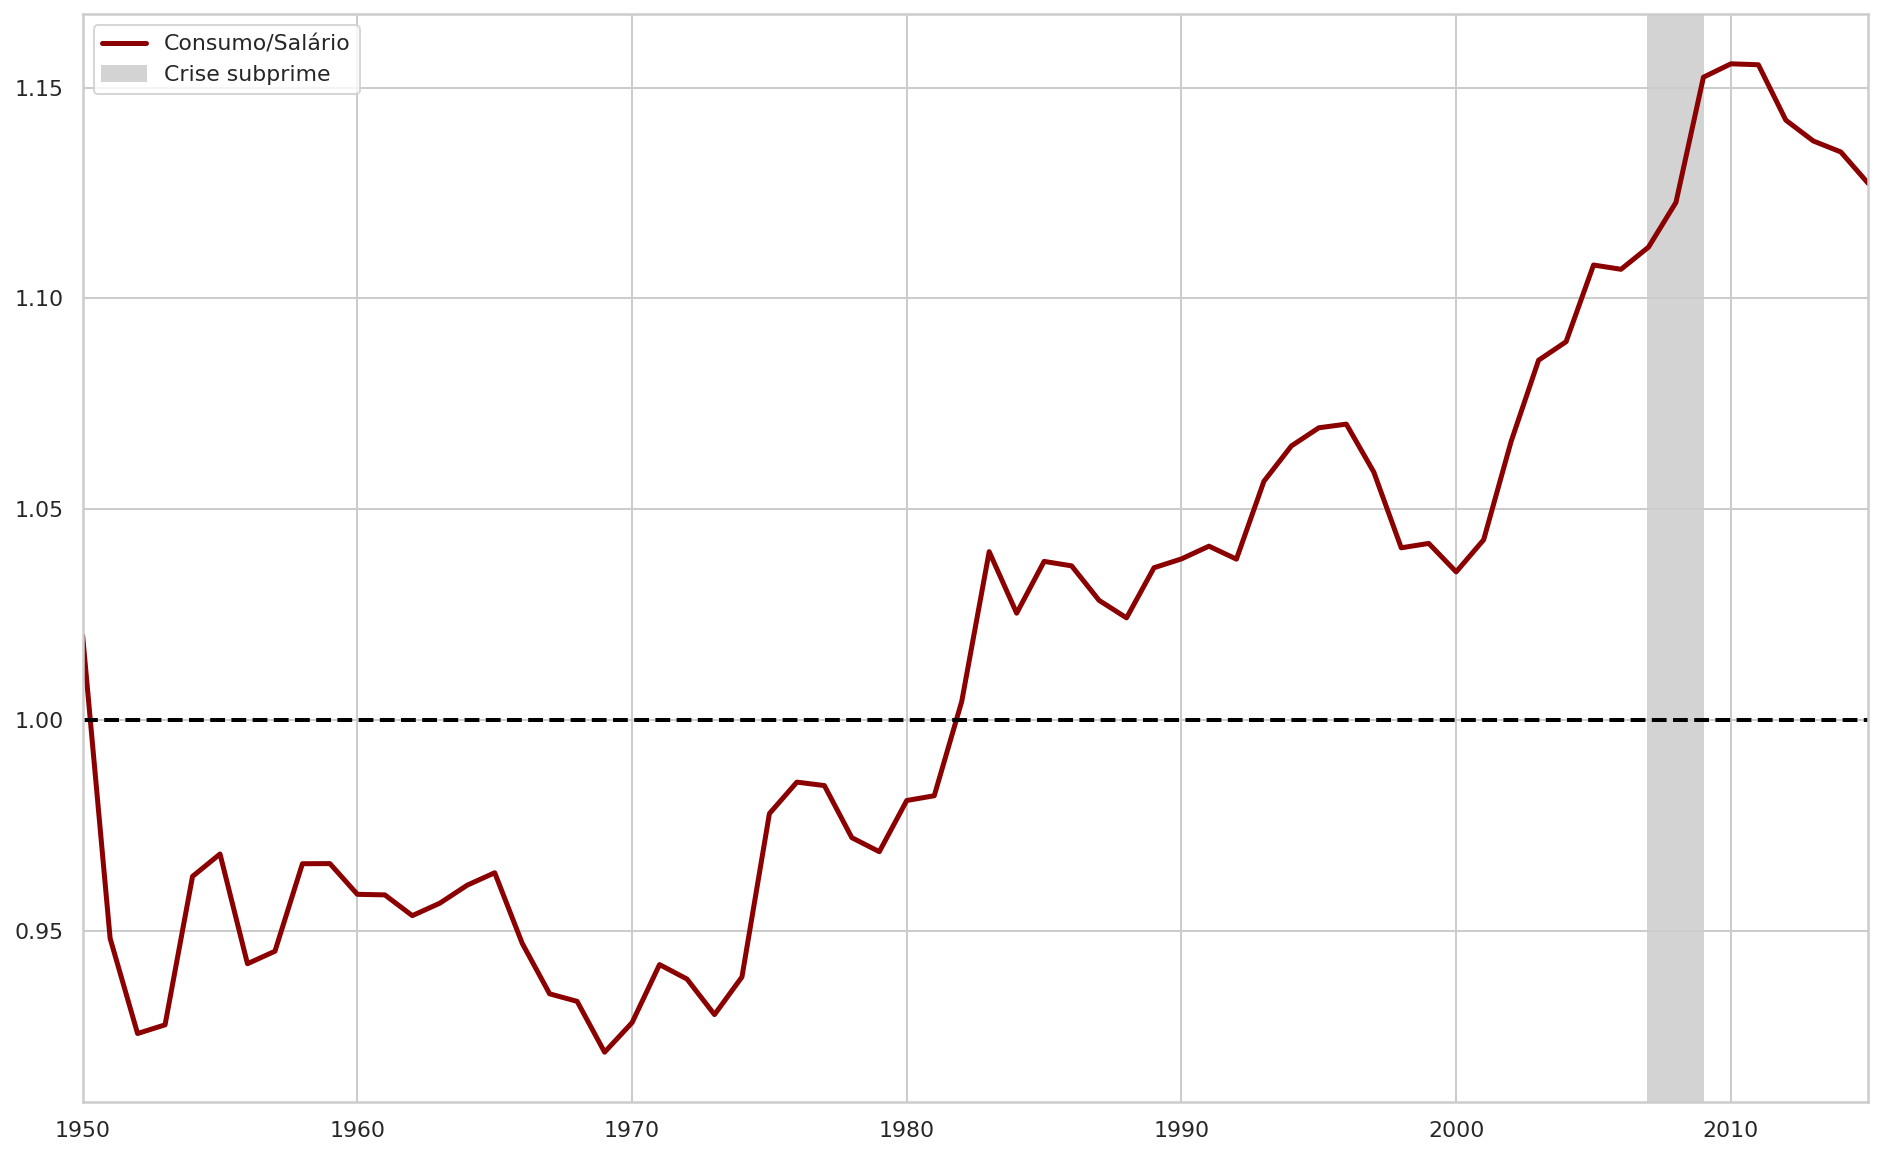

In [15]:
fig, ax = plt.subplots(figsize=(16, 10))

(df['Consumo']/df['Salários']).plot(
    ax=ax,
    color=('darkred'),
    linewidth=2.5,
    label='Consumo/Salário'
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    zorder=0
)
ax.axhline(y=1,ls='--', lw=2, color='black')
ax.legend()

plt.show()

# Curva de concentração

In [16]:
df = pd.read_excel(
    'SCF_merged.xlsx', 
    sheet_name='Riqueza',
    index_col=[0]
)

imoveis = df.loc['Imóveis',:]
imoveis = imoveis.drop(['Percentil da riqueza'], axis='columns')
imoveis.index = [.249, .499, .749, .899, 1]
imoveis = imoveis/100

acoes = df.loc['Ações',:]
acoes = acoes.drop(['Percentil da riqueza'], axis='columns')
acoes.index = [.249, .499, .749, .899, 1]
acoes = acoes/100

secund = df.loc['Secundário',:]
secund = secund.drop(['Percentil da riqueza'], axis='columns')
secund.index = [.249, .499, .749, .899, 1]
secund = secund/100

# Suavizando curvas
def suavizacao(serie, n=1000, k=2):

    xnew = np.linspace(serie.min().min(), serie.max().max(), n) 
    suavizado = serie.apply(lambda x: make_interp_spline(x.index, x, k=k)(xnew))
    suavizado = suavizado[suavizado > 0].dropna()
    suavizado.index = suavizado.index/n
    return suavizado

imoveis = suavizacao(imoveis)
#acoes = suavizacao(acoes)
#secund = suavizacao(secund)


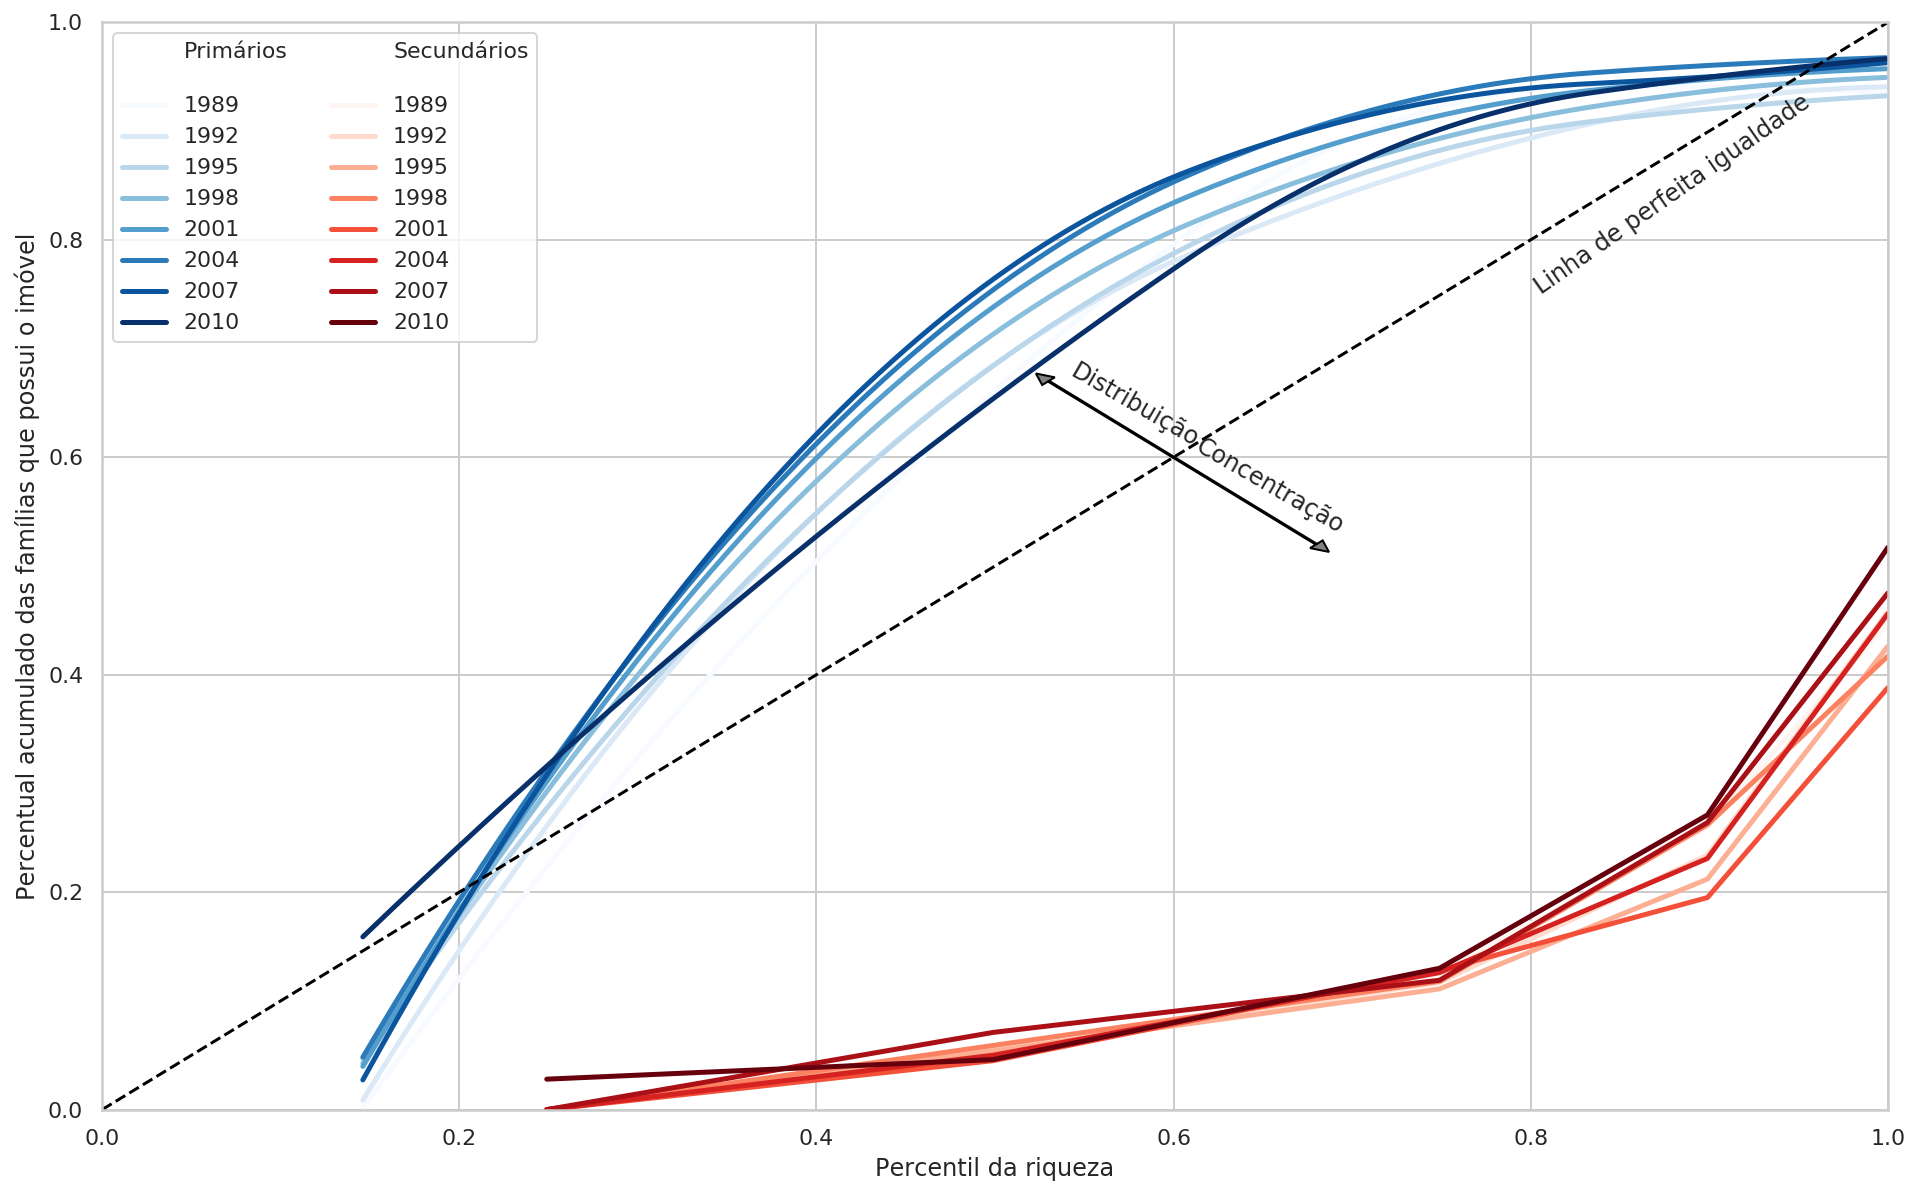

In [17]:
df1 = imoveis.loc[:, imoveis.columns <= 2010]
df2 = acoes.loc[:, acoes.columns <= 2010]
df3 = secund.loc[:, secund.columns <= 2010]

fig, ax = plt.subplots(figsize=(16, 10))

ax.plot(
    np.linspace(0,0), 
    np.linspace(0,0),
    color='white',
    ls='-',
    label='Primários\n'
)

df1.plot(
    ax=ax,
    cmap="Blues", 
    linewidth=2.5,
)

ax.plot(
    np.linspace(0,0), 
    np.linspace(0,0),
    color='white',
    ls='-',
    label='Secundários\n'
)

df3.plot(
    ax=ax,
    cmap="Reds", 
    linewidth=2.5,
)

ax.legend(ncol=2)

ax.plot(
    np.linspace(*ax.get_xlim()), 
    np.linspace(*ax.get_xlim()),
    color='black',
    ls='--',
)

ax.arrow(0.6, 0.6, +0.08, -0.08, head_width=0.01, head_length=0.01, fc='gray', ec='black')
ax.text(.61,.53, "Concentração", fontsize=12, rotation=-30)
ax.arrow(0.6, 0.6, -0.07, 0.07, head_width=0.01, head_length=0.01, fc='gray', ec='black')
ax.text(.54,.61, "Distribuição", fontsize=12, rotation=-30)
ax.text(.8,.75, "Linha de perfeita igualdade", fontsize=12, rotation=35)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_xlabel('Percentil da riqueza')
ax.set_ylabel('Percentual acumulado das famílias que possui o imóvel')

plt.show()

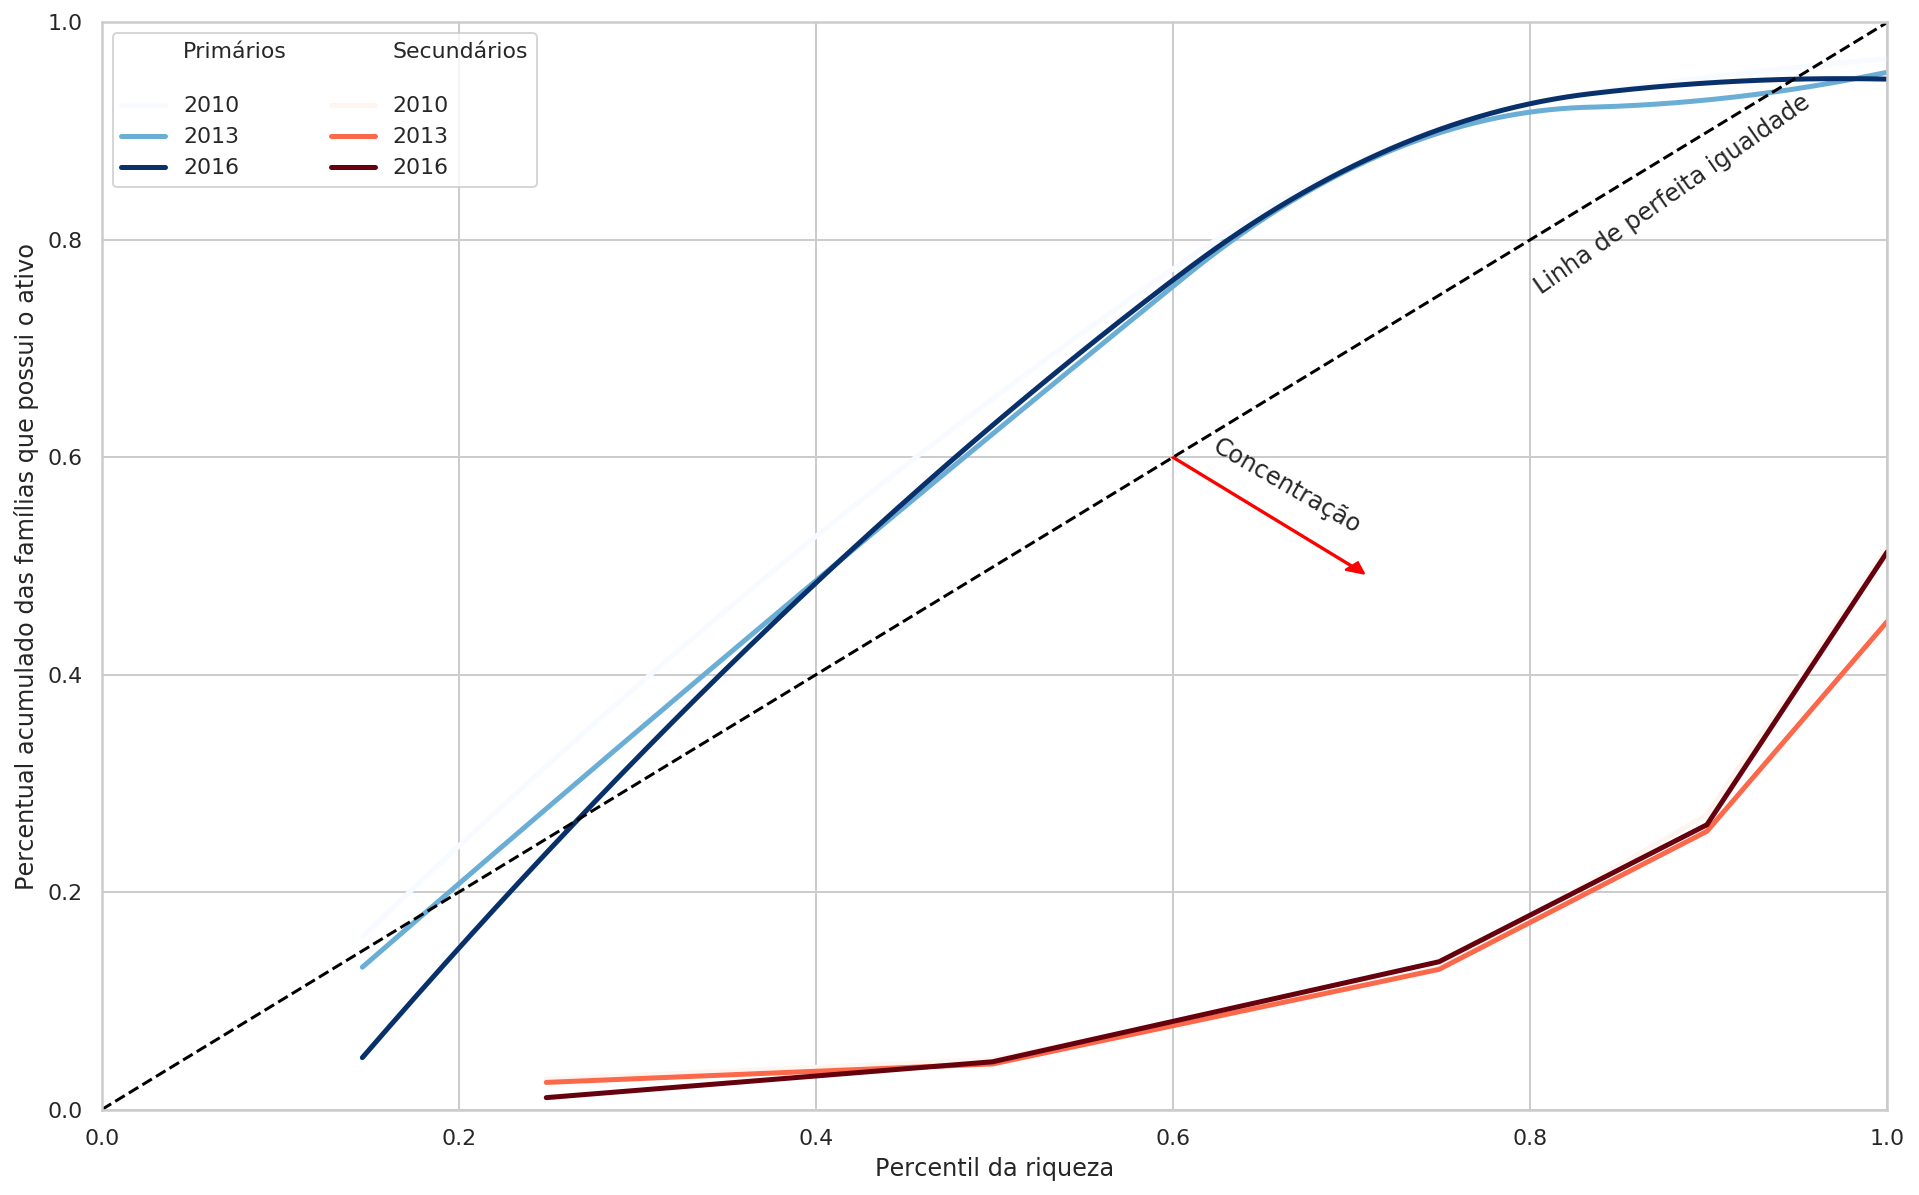

In [18]:
df1 = imoveis.loc[:, imoveis.columns > 2007]
df2 = acoes.loc[:, acoes.columns > 2007]
df3 = secund.loc[:, secund.columns > 2007]

fig, ax = plt.subplots(figsize=(16, 10))

ax.plot(
    np.linspace(0,0), 
    np.linspace(0,0),
    color='white',
    ls='-',
    label='Primários\n'
)

df1.plot(
    ax=ax,
    cmap="Blues", 
    linewidth=2.5,
)

ax.plot(
    np.linspace(0,0), 
    np.linspace(0,0),
    color='white',
    ls='-',
    label='Secundários\n'
)

df3.plot(
    ax=ax,
    cmap="Reds", 
    linewidth=2.5,
)

ax.legend(ncol=2)

ax.plot(
    np.linspace(*ax.get_xlim()), 
    np.linspace(*ax.get_xlim()),
    color='black',
    ls='--',
)

ax.arrow(0.6, 0.6, +0.1, -0.1, head_width=0.01, head_length=0.01, fc='red', ec='red')
ax.text(.62,.53, "Concentração", fontsize=12, rotation=-30)
ax.text(.8,.75, "Linha de perfeita igualdade", fontsize=12, rotation=35)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_xlabel('Percentil da riqueza')
ax.set_ylabel('Percentual acumulado das famílias que possui o ativo')

plt.show()

In [19]:
df = pd.read_excel(
    'SCF_merged.xlsx', 
    sheet_name='Porcentagem_Renda',
    index_col=[0]
)

imoveis = df.loc['Imóveis',:]
imoveis = imoveis.drop(['Percentil da renda'], axis='columns')
imoveis.index = [.2, .4, .6, .8, .9, .99]
imoveis = imoveis/100

total = df.loc['Total',:]
total = total.drop(['Percentil da renda'], axis='columns')
total.index = [.2, .4, .6, .8, .9, .99]
total = total/100

acoes = total - imoveis
acoes

,1989,1992,1995,1998,2001,2004,2007,2010,2013,2016
0.20,0.061,0.068,0.068,0.053,0.019,0.071,0.121,0.088,0.102,0.074
0.40,0.070,0.049,0.045,0.035,0.037,0.062,0.035,0.041,0.029,0.038
0.60,0.088,0.077,0.052,0.070,0.040,0.035,0.064,0.039,0.030,0.041
0.80,0.075,0.073,0.053,0.086,0.070,0.045,0.055,0.037,0.049,0.054
0.90,0.068,0.095,0.056,0.094,0.096,0.052,0.097,0.047,0.061,0.071
0.99,0.179,0.203,0.200,0.236,0.202,0.181,0.246,0.177,0.200,0.203


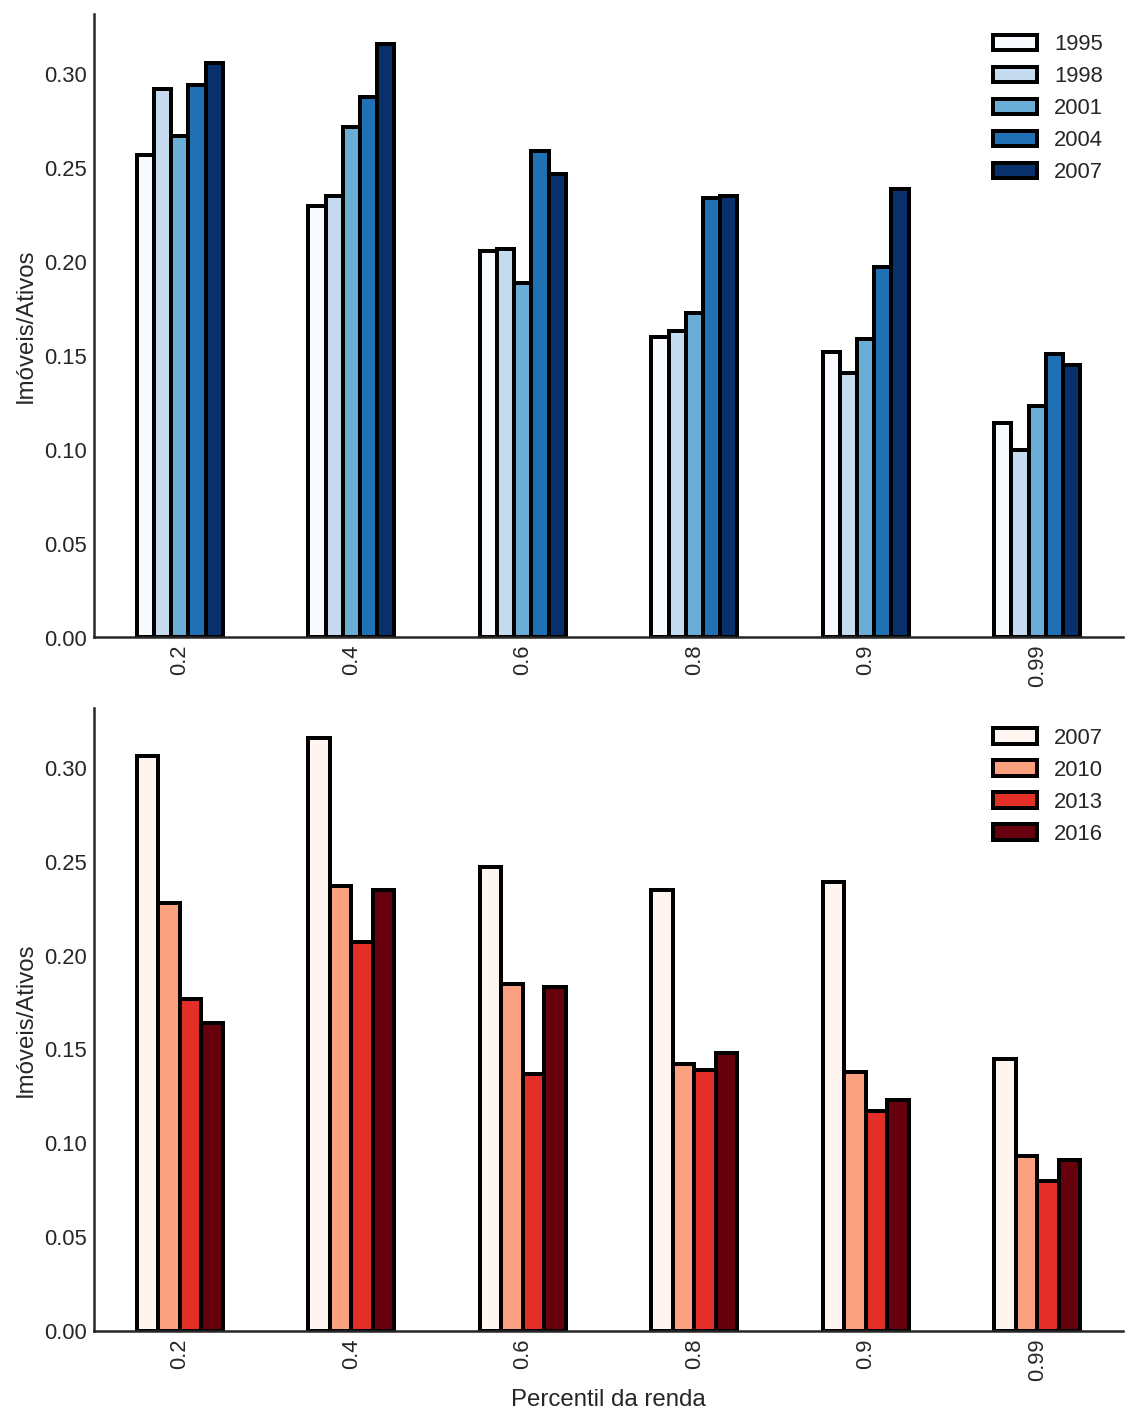

In [20]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharey=True)

imoveis.loc[:, (imoveis.columns < 2010) & (imoveis.columns >= 1995)].plot(
    ax=ax[0],
    cmap="Blues", 
    linewidth=2,
    kind='bar',
    edgecolor='black'
)
ax[0].set_ylabel('Imóveis/Ativos')

imoveis.loc[:, imoveis.columns >= 2007].plot(
    ax=ax[1],
    cmap="Reds", 
    linewidth=2,
    kind='bar',
    edgecolor='black'
)

ax[1].set_xlabel('Percentil da renda')
ax[1].set_ylabel('Imóveis/Ativos')

sns.despine()
sns.set_context('paper')
plt.tight_layout()
plt.show()

# Volatilidade

In [21]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'PRFI', # Domestic business
        'PNFI', # Households and institutions
        'GDP', # Gross Domestic Product
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Residencial',
    'Não-Residencial',
    'PIB'
]
df.index.name = ''
df = df.pct_change(4).dropna()
df = df.dropna()

df.head()

,Residencial,Não-Residencial,PIB
,,,
1948-01-01,0.455744,0.137521,0.092851
1948-04-01,0.553674,0.114378,0.108140
1948-07-01,0.306193,0.146682,0.118641
1948-10-01,-0.005048,0.136398,0.079389
1949-01-01,-0.076637,0.012469,0.034966


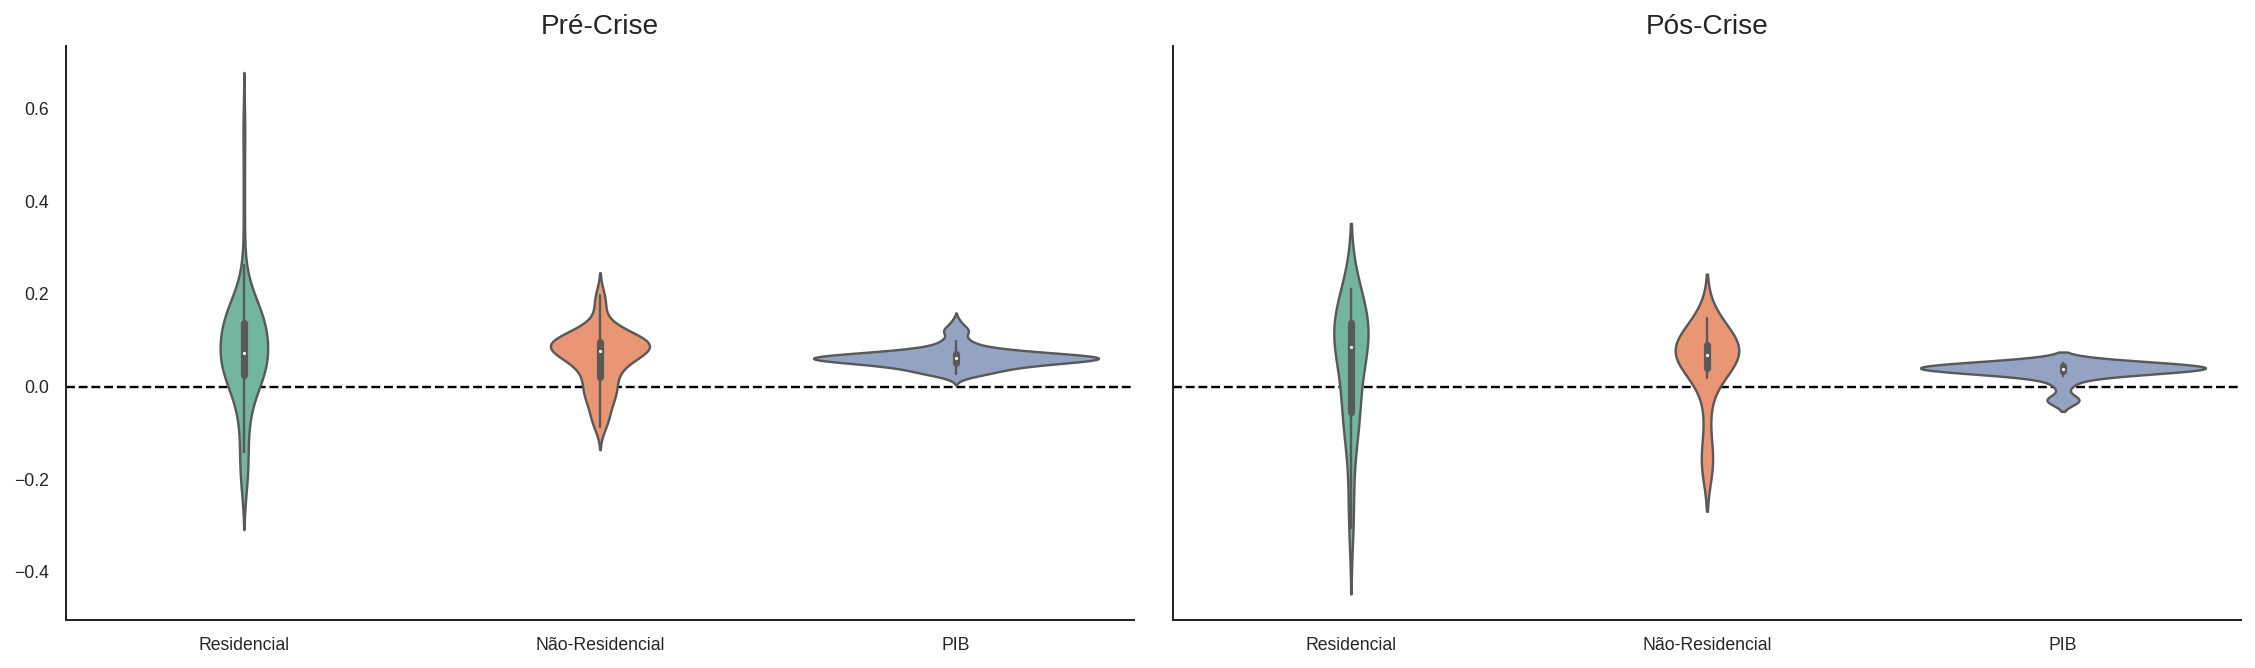

In [22]:
fig, ax = plt.subplots(1,2, figsize=(16,5), sharey=True, sharex=True)

sns.violinplot(
    data=df.loc[(df.index>'1980') & (df.index<'2007'),:], 
    ax = ax[0],
    palette="Set2",
    lw=2
)

sns.violinplot(
    data=df.loc[(df.index>'2009'),:], 
    ax = ax[1],
    palette="Set2",
)

ax[0].axhline(y=0,ls='--', color='black', zorder=0)
ax[1].axhline(y=0,ls='--', color='black', zorder=0)

ax[0].set_title('Pré-Crise', fontsize=14)
ax[1].set_title('Pós-Crise', fontsize=14)

sns.despine()
sns.set_context('talk')
plt.tight_layout()
plt.show()

# Preço dos imóveis

In [23]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'B944RG3Q086SBEA', # Single family (chain-type price index)
        'B292RG3Q086SBEA', # Multifamily (chain-type price index)
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Unifamiliar',
    'Multifamiliar',
]
df.index.name = ''

df.head()

,Unifamiliar,Multifamiliar
,,
1958-01-01,12.081,10.160
1958-04-01,12.081,10.160
1958-07-01,12.082,10.162
1958-10-01,12.082,10.161
1959-01-01,12.081,10.162


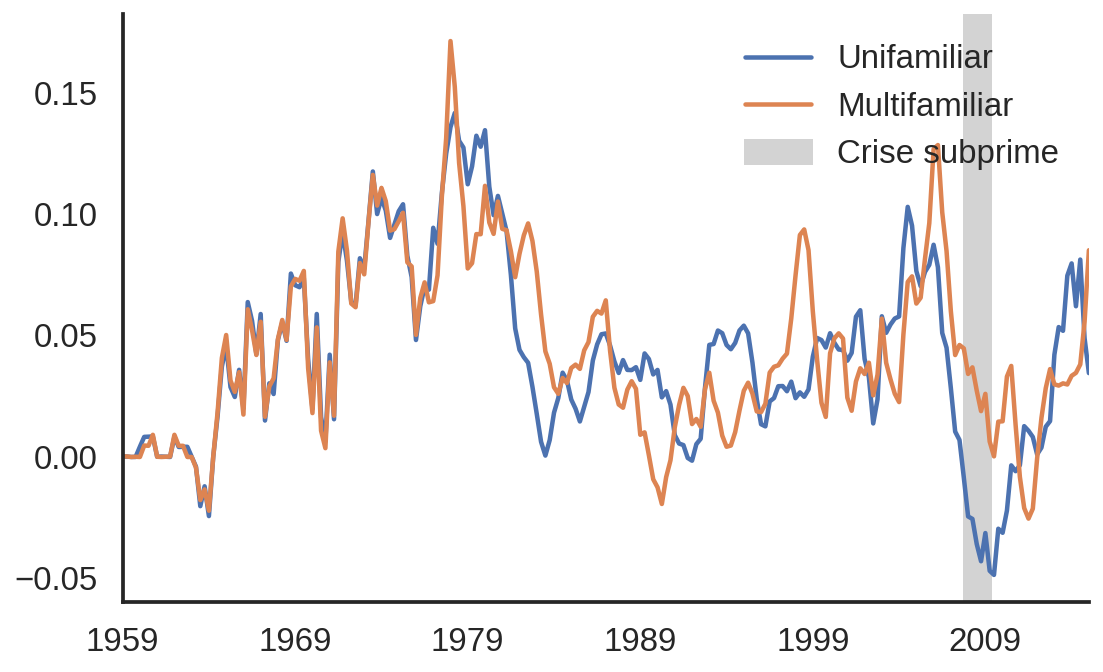

In [24]:
fig, ax = plt.subplots(figsize=(8,5))

df.pct_change(4).dropna().plot(ax=ax)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime'
)

ax.legend()


sns.despine()
sns.set_context('talk')
plt.tight_layout()
plt.show()

# Investimento residencial

In [25]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'PRFI', # Private Residential Fixed Investment
        'GNP', # Gross National Product
        'PCEC', # Personal Consumption Expenditures
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Investimento residencial',
    'PNB',
    'Consumo'
]
df.index.name = ''

df['Ih/Renda'] = (df['Investimento residencial']/df['PNB'])*100
df['Ih/Consumo'] = (df['Investimento residencial']/df['Consumo'])*100
df['Ih/Consumo'] = df['Ih/Consumo']/(df['Ih/Consumo']["2000-01-01"])

cycle, trend = sm.tsa.filters.hpfilter(df['Ih/Consumo'], 1600)
df["Tendência"] = trend
df["Ciclo"] = cycle
df.head()

,Investimento residencial,PNB,Consumo,Ih/Renda,Ih/Consumo,Tendência,Ciclo
,,,,,,,
1947-01-01,10.541,244.142,156.161,4.317569,0.921900,1.077204,-0.155304
1947-04-01,10.573,247.063,160.031,4.279475,0.902336,1.094870,-0.192534
1947-07-01,12.466,250.716,163.543,4.972160,1.041045,1.112440,-0.071395
1947-10-01,15.254,260.981,167.672,5.844870,1.242503,1.129695,0.112808
1948-01-01,15.345,267.133,170.372,5.744330,1.230107,1.146373,0.083734


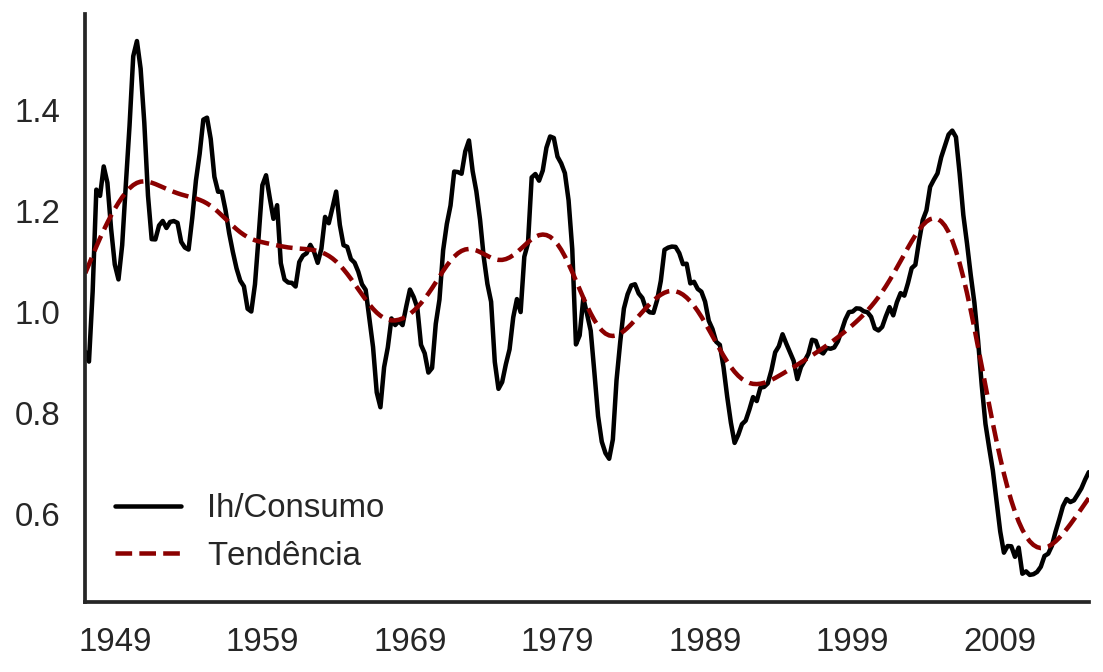

In [26]:
fig, ax = plt.subplots(figsize=(8,5))

df[['Ih/Consumo']].plot(
    ax=ax,
    color=('black'),
    ls='-'
)

df[['Tendência']].plot(
    ax=ax,
    color=('darkred'),
    ls='--'
)


ax.legend()


sns.despine()
sns.set_context('talk')
plt.tight_layout()
plt.show()

In [27]:
start = dt(1947, 1, 1)
end = dt(2019, 1, 1)

df = web.DataReader(
    [
        'PRFI', # 
        'PBRESCONS', # Total Public Construction Spending: Residential 
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Privado',
    'Público',
]
df.index.name = ''
df['Público'] = df['Público']/1000

df=df.dropna()
df.head()

,Privado,Público
,,
2002-01-01,538.339,5.348
2002-04-01,554.846,5.266
2002-07-01,558.880,5.539
2002-10-01,578.313,5.014
2003-01-01,601.444,5.261


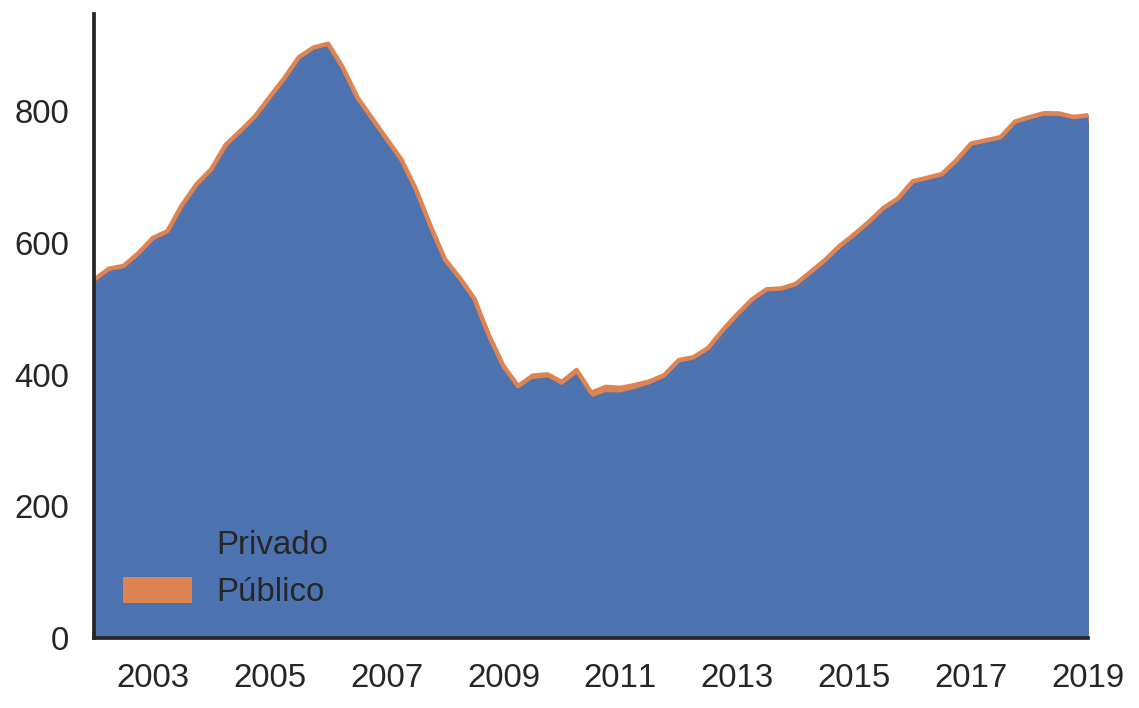

In [28]:
fig, ax = plt.subplots(figsize=(8,5))

df.plot(kind='area', stacked=True, ax=ax)

sns.despine()
sns.set_context('paper')
plt.tight_layout()
plt.show()

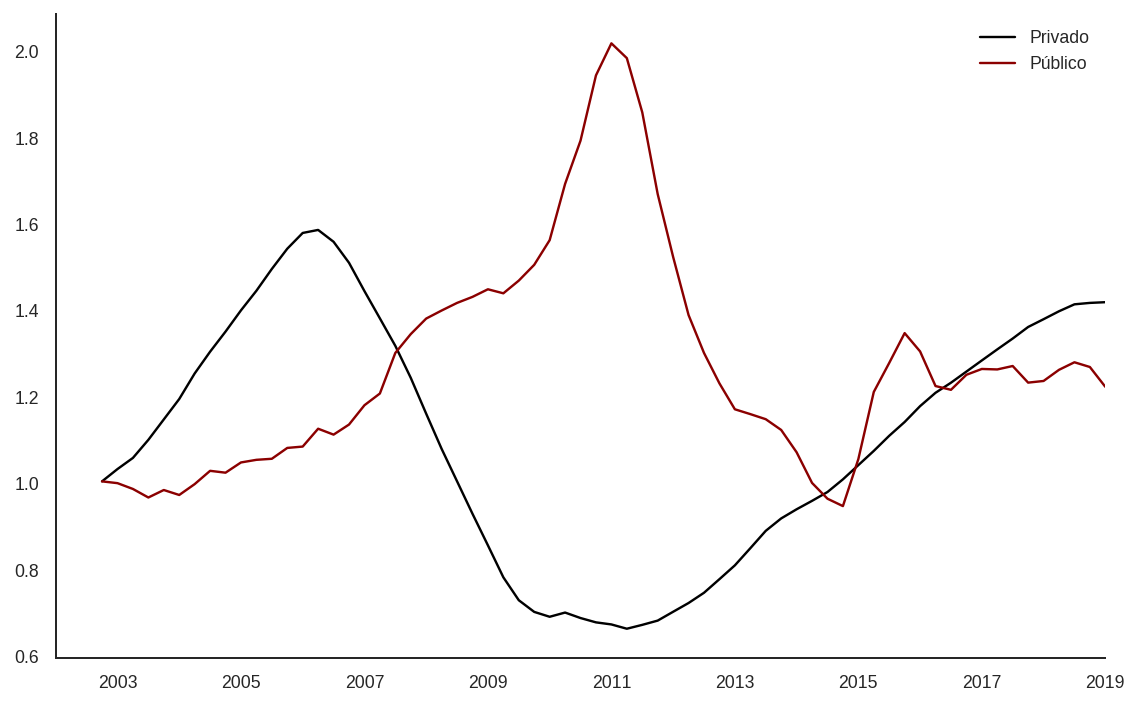

In [29]:
for i in df.columns:
    df[i] = df[i]/(df[i]['2002-04-01'])

df = df.dropna()

fig, ax = plt.subplots(figsize=(8,5))

df.rolling(4).mean().plot(
    ax=ax,
    color=('black', 'darkred'),
    ls='-'
)


ax.legend()


sns.despine()
sns.set_context('paper')
plt.tight_layout()
plt.show()